In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.font_manager as fm
from sklearn.preprocessing import LabelEncoder
# 1. 설치된 한글 폰트 확인
fonts = [f.name for f in fm.fontManager.ttflist]
print('설치된 폰트 목록:', fonts)

# 2. 한글 폰트 설정 (아래 폰트 중 하나 선택)
plt.rc('font', family='Malgun Gothic')  # 맑은 고딕
# plt.rc('font', family='NanumGothic')  # 나눔고딕
# plt.rc('font', family='NanumBarunGothic')  # 나눔바른고딕

# 3. 마이너스 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

설치된 폰트 목록: ['STIXSizeOneSym', 'DejaVu Sans Mono', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'cmr10', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'STIXSizeOneSym', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXSizeTwoSym', 'STIXGeneral', 'cmmi10', 'DejaVu Serif', 'cmss10', 'cmtt10', 'cmb10', 'STIXGeneral', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'STIXGeneral', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans', 'cmex10', 'cmsy10', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXSizeFiveSym', 'STIXNonUnicode', 'DejaVu Serif Display', 'Franklin Gothic Heavy', 'Magic R', 'HYMyeongJo-Extra', 'French Script MT', 'Tw Cen MT Condensed', 'Javanese Text', 'Bodoni MT', 'Arial', 'Segoe UI', 'Segoe UI', 'Bodoni MT', 'HYSinMyeongJo-Medium', 'Comic Sans MS', 'Book Antiqua', 'Segoe MDL2 Assets', 'Leelawadee', 'Webdings', 'Wingdings', 'Poor Richard', 'Bodoni MT', 'Franklin Gothic Book', 'Eras Demi ITC', 'Leela

In [2]:
cd ../

c:\Users\okpl8\Documents\project_LG\src


In [3]:
cd ../

c:\Users\okpl8\Documents\project_LG


In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.head()

,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRAIN_000000,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRAIN_000001,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRAIN_000002,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRAIN_000003,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRAIN_000004,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


In [5]:
train.head()

,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRAIN_000000,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRAIN_000001,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRAIN_000002,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRAIN_000003,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRAIN_000004,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

In [7]:
train.describe()


,임신 시도 또는 마지막 임신 경과 연수,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
count,9370.000000,256351.000000,250060.000000,2718.0,250060.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,...,250060.000000,250060.000000,2179.0,1929.0,198863.0,1436.000000,202616.000000,212785.000000,40369.000000,256351.000000
mean,9.270651,0.771286,0.233476,1.0,0.012781,0.028516,0.013115,0.030724,0.012432,0.033068,...,0.009830,0.004195,1.0,1.0,0.0,0.001393,0.005385,3.254741,0.045629,0.258349
std,3.550313,0.420005,0.423043,0.0,0.112328,0.166441,0.113767,0.172568,0.110805,0.178814,...,0.098656,0.064633,0.0,0.0,0.0,0.037307,0.111504,1.715697,0.418672,0.437728
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,3.000000,0.000000,0.000000
75%,11.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,5.000000,0.000000,1.000000
max,20.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,0.0,1.000000,7.000000,7.000000,7.000000,1.000000


In [8]:
train = train.drop(['ID'], axis=1)
test = test.drop(['ID'], axis=1)
train.head()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


In [9]:
categorical_columns = train.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\n{col} 컬럼의 고유값:")
    print(train[col].value_counts())
    print("="*50)


시술 시기 코드 컬럼의 고유값:
시술 시기 코드
TRDQAZ    38969
TRCMWS    38090
TRYBLT    36713
TRVNRY    36173
TRJXFG    36031
TRZKPL    35544
TRXQMD    34831
Name: count, dtype: int64

시술 당시 나이 컬럼의 고유값:
시술 당시 나이
만18-34세    102476
만35-37세     57780
만38-39세     39247
만40-42세     37348
만43-44세     12253
만45-50세      6918
알 수 없음        329
Name: count, dtype: int64

시술 유형 컬럼의 고유값:
시술 유형
IVF    250060
DI       6291
Name: count, dtype: int64

특정 시술 유형 컬럼의 고유값:
특정 시술 유형
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST                         1248
IVF:IVF                                  1146
ICSI:IVF                                  873
ICSI / AH                                 769
IVF:ICSI                                  392
IVF / AH                                  31

In [10]:
# 결측치 확인
missing_values = train.isnull().sum()
print("결측치 현황:")
print(missing_values[missing_values > 0])

결측치 현황:
임신 시도 또는 마지막 임신 경과 연수    246981
특정 시술 유형                      2
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253633
착상 전 유전 진단 사용 여부           6291
배아 생성 주요 이유                6291
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
파트너 정자와 혼합된 난자 수           6291
기증자 정자와 혼합된 난자 수           6291
동결 배아 사용 여부                6291
신선 배아 사용 여부                6291
기증 배아 사용 여부                6291
대리모 여부                     6291
PGD 시술 여부                254172
PGS 시술 여부                254422
난자 채취 경과일                 57488
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982


In [11]:
# 결측치 비율 계산
missing_ratio = (missing_values / len(train)) * 100
print("\n결측치 비율(%):")
print(missing_ratio[missing_ratio > 0])


결측치 비율(%):
임신 시도 또는 마지막 임신 경과 연수    96.344855
특정 시술 유형                  0.000780
단일 배아 이식 여부               2.454057
착상 전 유전 검사 사용 여부         98.939735
착상 전 유전 진단 사용 여부          2.454057
배아 생성 주요 이유               2.454057
총 생성 배아 수                 2.454057
미세주입된 난자 수                2.454057
미세주입에서 생성된 배아 수           2.454057
이식된 배아 수                  2.454057
미세주입 배아 이식 수              2.454057
저장된 배아 수                  2.454057
미세주입 후 저장된 배아 수           2.454057
해동된 배아 수                  2.454057
해동 난자 수                   2.454057
수집된 신선 난자 수               2.454057
저장된 신선 난자 수               2.454057
혼합된 난자 수                  2.454057
파트너 정자와 혼합된 난자 수          2.454057
기증자 정자와 혼합된 난자 수          2.454057
동결 배아 사용 여부               2.454057
신선 배아 사용 여부               2.454057
기증 배아 사용 여부               2.454057
대리모 여부                    2.454057
PGD 시술 여부                99.149994
PGS 시술 여부                99.247516
난자 채취 경과일                22.425503
난자 해동 경과일                99.439831
난자 혼합 경과

In [12]:
# obj중 알수없음이 많은것은 없앰, 결측치 비율이 많은것도 제외외
train = train.drop(['배란 유도 유형', '난자 기증자 나이', '정자 기증자 나이', '임신 시도 또는 마지막 임신 경과 연수', '착상 전 유전 검사 사용 여부', 'PGD 시술 여부', 'PGS 시술 여부','난자 해동 경과일','배아 해동 경과일' ], axis=1)
train.head()
test = test.drop(['배란 유도 유형', '난자 기증자 나이', '정자 기증자 나이', '임신 시도 또는 마지막 임신 경과 연수', '착상 전 유전 검사 사용 여부', 'PGD 시술 여부', 'PGS 시술 여부','난자 해동 경과일','배아 해동 경과일' ], axis=1)
test.head()

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,...,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,난자 채취 경과일,난자 혼합 경과일,배아 이식 경과일
0,TRYBLT,만35-37세,IVF,IVF,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,TRDQAZ,만18-34세,IVF,IVF,1,0.0,0.0,0,0,0,...,1.0,본인 제공,기증 제공,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2,TRCMWS,만40-42세,IVF,ICSI,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,3.0
3,TRJXFG,만40-42세,IVF,ICSI,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,TRJXFG,만35-37세,IVF,ICSI,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,5.0


In [13]:
# 결측치 확인
missing_values = train.isnull().sum()
print("결측치 현황:")
print(missing_values[missing_values > 0])

결측치 현황:
특정 시술 유형                2
단일 배아 이식 여부          6291
착상 전 유전 진단 사용 여부     6291
배아 생성 주요 이유          6291
총 생성 배아 수            6291
미세주입된 난자 수           6291
미세주입에서 생성된 배아 수      6291
이식된 배아 수             6291
미세주입 배아 이식 수         6291
저장된 배아 수             6291
미세주입 후 저장된 배아 수      6291
해동된 배아 수             6291
해동 난자 수              6291
수집된 신선 난자 수          6291
저장된 신선 난자 수          6291
혼합된 난자 수             6291
파트너 정자와 혼합된 난자 수     6291
기증자 정자와 혼합된 난자 수     6291
동결 배아 사용 여부          6291
신선 배아 사용 여부          6291
기증 배아 사용 여부          6291
대리모 여부               6291
난자 채취 경과일           57488
난자 혼합 경과일           53735
배아 이식 경과일           43566
dtype: int64


In [14]:
#인코딩
label_cols = ['총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수','DI 시술 횟수', '총 임신 횟수',
              'IVF 임신 횟수','시술 시기 코드','시술 당시 나이', "시술 유형", "난자 출처", "정자 출처",
              'DI 임신 횟수','총 출산 횟수','IVF 출산 횟수','DI 출산 횟수']
le = LabelEncoder()
for col in label_cols:
    train[col] = le.fit_transform(train[col])  # train에 fit
    test[col] = le.transform(test[col])  # test에는 transform만 적용


In [15]:
categorical_columns = train.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\n{col} 컬럼의 고유값:")
    print(train[col].value_counts())
    print("="*50)


특정 시술 유형 컬럼의 고유값:
특정 시술 유형
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST                         1248
IVF:IVF                                  1146
ICSI:IVF                                  873
ICSI / AH                                 769
IVF:ICSI                                  392
IVF / AH                                  319
ICSI:Unknown                              207
IVF:Unknown                               100
ICI                                        96
Generic DI                                 71
IVI                                        23
ICSI / BLASTOCYST:IVF / BLASTOCYST          6
ICSI / BLASTOCYST :IVF / BLASTOCYST         4
FER                                         3
IVF / AH:ICSI / AH                          2
GIFT  

In [16]:
# 배아 생성 주요 이유 그룹화 함수
def categorize_embryo_reason(x):
    if "현재 시술용" in x:
        return "Current"
    elif "배아 저장용" in x:
        return "Storage"
    elif "기증용" in x:
        return "Donation"
    elif "난자 저장용" in x:
        return "Egg Storage"
    elif "연구용" in x:
        return "Research"
    else:
        return "Unknown"

# 결측값 처리 및 그룹화 적용
train["배아 생성 주요 이유"] = train["배아 생성 주요 이유"].fillna("Unknown").astype(str)
train["배아 생성 주요 이유"] = train["배아 생성 주요 이유"].apply(categorize_embryo_reason)

# Label Encoding 적용
le = LabelEncoder()
train["배아 생성 주요 이유"] = le.fit_transform(train["배아 생성 주요 이유"])

# 결측값 처리 및 그룹화 적용
test["배아 생성 주요 이유"] = test["배아 생성 주요 이유"].fillna("Unknown").astype(str)
test["배아 생성 주요 이유"] = test["배아 생성 주요 이유"].apply(categorize_embryo_reason)

# Label Encoding 적용
le = LabelEncoder()
test["배아 생성 주요 이유"] = le.fit_transform(test["배아 생성 주요 이유"])


In [17]:
# 특정 시술 유형 컬럼의 결측값을 'Unknown'으로 대체, 중복도 한개만 남김
train["특정 시술 유형"] = train["특정 시술 유형"].fillna("Unknown").astype(str)

# 특정 시술 유형 그룹화
def categorize_treatment(x):
    if "IVF" in x:
        return "IVF"
    elif "ICSI" in x:
        return "ICSI"
    elif "IUI" in x or "ICI" in x:
        return "IUI"
    else:
        return "Unknown"

train["특정 시술 유형"] = train["특정 시술 유형"].apply(categorize_treatment)

# Label Encoding 적용
le = LabelEncoder()
train["특정 시술 유형"] = le.fit_transform(train["특정 시술 유형"])

# 특정 시술 유형 컬럼의 결측값을 'Unknown'으로 대체, 중복도 한개만 남김
test["특정 시술 유형"] = test["특정 시술 유형"].fillna("Unknown").astype(str)

# 특정 시술 유형 그룹화
def categorize_treatment(x):
    if "IVF" in x:
        return "IVF"
    elif "ICSI" in x:
        return "ICSI"
    elif "IUI" in x or "ICI" in x:
        return "IUI"
    else:
        return "Unknown"

test["특정 시술 유형"] = test["특정 시술 유형"].apply(categorize_treatment)

# Label Encoding 적용
le = LabelEncoder()
test["특정 시술 유형"] = le.fit_transform(test["특정 시술 유형"])

In [18]:
train.head()

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,...,난자 출처,정자 출처,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,난자 채취 경과일,난자 혼합 경과일,배아 이식 경과일,임신 성공 여부
0,6,0,1,0,1,0.0,0.0,0,0,0,...,1,3,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0
1,5,5,1,0,0,0.0,0.0,0,0,0,...,1,3,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0
2,3,0,1,2,1,0.0,0.0,0,0,0,...,1,3,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
3,2,1,1,0,1,0.0,0.0,0,0,0,...,1,3,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0
4,3,0,1,0,1,0.0,0.0,0,0,0,...,1,3,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0


In [19]:
print(list(train.columns))

['시술 시기 코드', '시술 당시 나이', '시술 유형', '특정 시술 유형', '배란 자극 여부', '단일 배아 이식 여부', '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인', '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 난관 질환', '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제', '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인', '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '배아 생성 주요 이유', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수', '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부', '대리모 여부', '난자 채취 경과일', '난자 혼합 경과일', '배아 이식 경과일', '임신 성공 여부']


In [20]:
cols = train.columns

for col in cols:
    print(train[col].value_counts())

시술 시기 코드
1    38969
0    38090
5    36713
3    36173
2    36031
6    35544
4    34831
Name: count, dtype: int64
시술 당시 나이
0    102476
1     57780
2     39247
3     37348
4     12253
5      6918
6       329
Name: count, dtype: int64
시술 유형
1    250060
0      6291
Name: count, dtype: int64
특정 시술 유형
0    127270
2     95845
3     27040
1      6196
Name: count, dtype: int64
배란 자극 여부
1    197720
0     58631
Name: count, dtype: int64
단일 배아 이식 여부
0.0    191677
1.0     58383
Name: count, dtype: int64
착상 전 유전 진단 사용 여부
0.0    246864
1.0      3196
Name: count, dtype: int64
남성 주 불임 원인
0    249041
1      7310
Name: count, dtype: int64
남성 부 불임 원인
0    252989
1      3362
Name: count, dtype: int64
여성 주 불임 원인
0    248475
1      7876
Name: count, dtype: int64
여성 부 불임 원인
0    253164
1      3187
Name: count, dtype: int64
부부 주 불임 원인
0    247874
1      8477
Name: count, dtype: int64
부부 부 불임 원인
0    254104
1      2247
Name: count, dtype: int64
불명확 불임 원인
0    192076
1     64275
Name: count, dtype: int64
불임 원인 - 

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 59 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   시술 시기 코드            256351 non-null  int32  
 1   시술 당시 나이            256351 non-null  int32  
 2   시술 유형               256351 non-null  int32  
 3   특정 시술 유형            256351 non-null  int32  
 4   배란 자극 여부            256351 non-null  int64  
 5   단일 배아 이식 여부         250060 non-null  float64
 6   착상 전 유전 진단 사용 여부    250060 non-null  float64
 7   남성 주 불임 원인          256351 non-null  int64  
 8   남성 부 불임 원인          256351 non-null  int64  
 9   여성 주 불임 원인          256351 non-null  int64  
 10  여성 부 불임 원인          256351 non-null  int64  
 11  부부 주 불임 원인          256351 non-null  int64  
 12  부부 부 불임 원인          256351 non-null  int64  
 13  불명확 불임 원인           256351 non-null  int64  
 14  불임 원인 - 난관 질환       256351 non-null  int64  
 15  불임 원인 - 남성 요인       256351 non-nul

In [22]:
train.describe()

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,...,난자 출처,정자 출처,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,난자 채취 경과일,난자 혼합 경과일,배아 이식 경과일,임신 성공 여부
count,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,250060.000000,250060.000000,256351.000000,256351.000000,256351.000000,...,256351.000000,256351.000000,250060.000000,250060.000000,250060.000000,250060.000000,198863.0,202616.000000,212785.000000,256351.000000
mean,2.947923,1.302488,0.975459,1.088375,0.771286,0.233476,0.012781,0.028516,0.013115,0.030724,...,0.963027,2.682833,0.160465,0.840342,0.009830,0.004195,0.0,0.005385,3.254741,0.258349
std,2.009923,1.392181,0.154720,1.133343,0.420005,0.423043,0.112328,0.166441,0.113767,0.172568,...,0.291011,0.921872,0.367038,0.366289,0.098656,0.064633,0.0,0.111504,1.715697,0.437728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000
50%,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,3.000000,0.000000
75%,5.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,5.000000,1.000000
max,6.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0,7.000000,7.000000,1.000000


In [23]:
missing_values = train.isnull().sum() / len(train) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

난자 채취 경과일           22.425503
난자 혼합 경과일           20.961494
배아 이식 경과일           16.994667
저장된 신선 난자 수          2.454057
대리모 여부               2.454057
기증 배아 사용 여부          2.454057
신선 배아 사용 여부          2.454057
동결 배아 사용 여부          2.454057
기증자 정자와 혼합된 난자 수     2.454057
파트너 정자와 혼합된 난자 수     2.454057
혼합된 난자 수             2.454057
단일 배아 이식 여부          2.454057
착상 전 유전 진단 사용 여부     2.454057
해동 난자 수              2.454057
해동된 배아 수             2.454057
미세주입 후 저장된 배아 수      2.454057
저장된 배아 수             2.454057
미세주입 배아 이식 수         2.454057
이식된 배아 수             2.454057
미세주입에서 생성된 배아 수      2.454057
미세주입된 난자 수           2.454057
총 생성 배아 수            2.454057
수집된 신선 난자 수          2.454057
dtype: float64


In [24]:
# 1️⃣ 중앙값 대체 (연속형 변수)
median_cols = ["난자 채취 경과일", "난자 혼합 경과일", "배아 이식 경과일"]
for col in median_cols:
    train[col].fillna(train[col].median(), inplace=True)

# 2️⃣ 평균값 대체 (연속형 변수, 결측 비율 낮음)
mean_cols = ["저장된 신선 난자 수", "기증 배아 사용 여부", "신선 배아 사용 여부", "동결 배아 사용 여부",
             "기증자 정자와 혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "혼합된 난자 수",
             "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부", "해동 난자 수", "해동된 배아 수",
             "미세주입 후 저장된 배아 수", "저장된 배아 수", "미세주입 배아 이식 수", "이식된 배아 수",
             "미세주입에서 생성된 배아 수", "미세주입된 난자 수", "총 생성 배아 수", "수집된 신선 난자 수"]
for col in mean_cols:
    train[col].fillna(train[col].mean(), inplace=True)

# 3️⃣ 최빈값(Mode) 대체 (범주형 변수)
mode_cols = ["대리모 여부"]
for col in mode_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)
    
    
    
    
# 1️⃣ 중앙값 대체 (연속형 변수)
median_cols = ["난자 채취 경과일", "난자 혼합 경과일", "배아 이식 경과일"]
for col in median_cols:
    test[col].fillna(test[col].median(), inplace=True)

# 2️⃣ 평균값 대체 (연속형 변수, 결측 비율 낮음)
mean_cols = ["저장된 신선 난자 수", "기증 배아 사용 여부", "신선 배아 사용 여부", "동결 배아 사용 여부",
             "기증자 정자와 혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "혼합된 난자 수",
             "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부", "해동 난자 수", "해동된 배아 수",
             "미세주입 후 저장된 배아 수", "저장된 배아 수", "미세주입 배아 이식 수", "이식된 배아 수",
             "미세주입에서 생성된 배아 수", "미세주입된 난자 수", "총 생성 배아 수", "수집된 신선 난자 수"]
for col in mean_cols:
    test[col].fillna(test[col].mean(), inplace=True)

# 3️⃣ 최빈값(Mode) 대체 (범주형 변수)
mode_cols = ["대리모 여부"]
for col in mode_cols:
    test[col].fillna(test[col].mode()[0], inplace=True)



C:\Users\okpl8\AppData\Local\Temp\ipykernel_33456\495126721.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
C:\Users\okpl8\AppData\Local\Temp\ipykernel_33456\495126721.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [25]:
print(train.isnull().sum().sum())  # 남은 결측치 개수 출력 (0이면 성공)


0


In [26]:
print(list(train.columns))

['시술 시기 코드', '시술 당시 나이', '시술 유형', '특정 시술 유형', '배란 자극 여부', '단일 배아 이식 여부', '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인', '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 난관 질환', '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제', '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인', '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '배아 생성 주요 이유', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수', '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부', '대리모 여부', '난자 채취 경과일', '난자 혼합 경과일', '배아 이식 경과일', '임신 성공 여부']


                불임 원인  임신 성공률 (%)
0       불임 원인 - 난관 질환   25.775515
1       불임 원인 - 남성 요인   27.989022
2       불임 원인 - 배란 장애   28.663316
3     불임 원인 - 자궁경부 문제    0.000000
4       불임 원인 - 자궁내막증   25.483554
5       불임 원인 - 정자 농도   25.000000
6  불임 원인 - 정자 면역학적 요인    0.000000
7      불임 원인 - 정자 운동성   17.525773
8       불임 원인 - 정자 형태   22.377622


C:\Users\okpl8\AppData\Local\Temp\ipykernel_33456\3754042808.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="불임 원인", y="임신 성공률 (%)", data=success_df, palette="coolwarm")


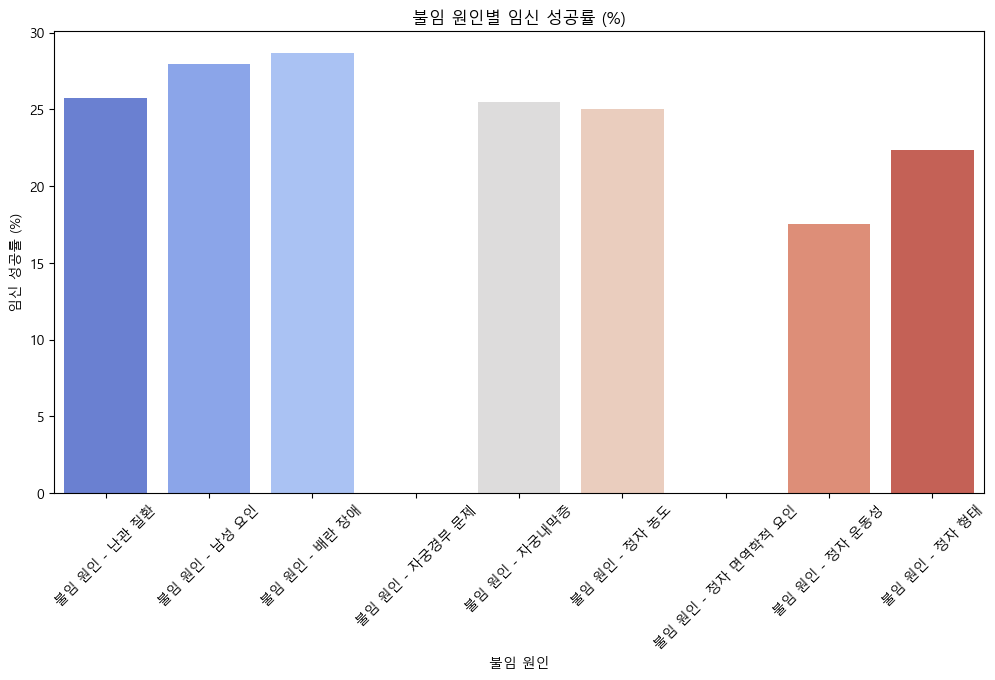

In [27]:

# 분석할 불임 원인 컬럼 리스트
infertility_causes = [
    "불임 원인 - 난관 질환", "불임 원인 - 남성 요인", "불임 원인 - 배란 장애",
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태"
]

# 불임 원인별 임신 성공률(%) 계산
success_rates = []
for cause in infertility_causes:
    success_rate = train[train[cause] == 1]["임신 성공 여부"].mean() * 100  # 성공률 %
    success_rates.append([cause, success_rate])

# 결과를 데이터프레임으로 변환
success_df = pd.DataFrame(success_rates, columns=["불임 원인", "임신 성공률 (%)"])

print(success_df)

# 불임 원인별 성공률 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x="불임 원인", y="임신 성공률 (%)", data=success_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("불임 원인별 임신 성공률 (%)")
plt.ylabel("임신 성공률 (%)")
plt.xlabel("불임 원인")
plt.show()

✅ 2. 주요 인사이트
1️⃣ "배란 장애"가 있는 여성도 비교적 높은 성공률(28.66%)을 보임

배란 장애는 치료(호르몬 요법 등)를 통해 극복 가능성이 있음
2️⃣ "남성 요인"은 평균보다 높은 성공률(27.99%)

치료 가능한 경우가 많고, ICSI(미세정자주입법) 등으로 극복 가능하기 때문
3️⃣ "정자 운동성 문제" (17.53%)와 "정자 형태 문제" (22.38%)는 비교적 낮은 성공률

남성 불임 요인 중에서도 운동성과 형태 문제가 더 치명적일 가능성 있음
4️⃣ "자궁경부 문제", "정자 면역학적 요인" 그룹은 임신 성공 사례 없음

샘플 개수가 적거나, 해결이 어려운 불임 원인일 가능성이 큼

In [28]:
# 컬럼 합칠수있는것 합치기
train["IVF 시술 비율"] = train["IVF 시술 횟수"] / (train["총 시술 횟수"] + 1)
train["DI 시술 비율"] = train["DI 시술 횟수"] / (train["총 시술 횟수"] + 1)

train["출산 성공률"] = train["총 출산 횟수"] / (train["총 임신 횟수"] + 1)
train["IVF 출산 비율"] = train["IVF 출산 횟수"] / (train["IVF 임신 횟수"] + 1)
train["DI 출산 비율"] = train["DI 출산 횟수"] / (train["DI 임신 횟수"] + 1)

train["미세주입 성공률"] = train["미세주입에서 생성된 배아 수"] / (train["미세주입된 난자 수"] + 1)
train["이식 성공률"] = train["이식된 배아 수"] / (train["총 생성 배아 수"] + 1)
train["배아 저장률"] = train["저장된 배아 수"] / (train["총 생성 배아 수"] + 1)


# 컬럼 합칠수있는것 합치기
test["IVF 시술 비율"] = test["IVF 시술 횟수"] / (test["총 시술 횟수"] + 1)
test["DI 시술 비율"] = test["DI 시술 횟수"] / (test["총 시술 횟수"] + 1)

test["출산 성공률"] = test["총 출산 횟수"] / (test["총 임신 횟수"] + 1)
test["IVF 출산 비율"] = test["IVF 출산 횟수"] / (test["IVF 임신 횟수"] + 1)
test["DI 출산 비율"] = test["DI 출산 횟수"] / (test["DI 임신 횟수"] + 1)

test["미세주입 성공률"] = test["미세주입에서 생성된 배아 수"] / (test["미세주입된 난자 수"] + 1)
test["이식 성공률"] = test["이식된 배아 수"] / (test["총 생성 배아 수"] + 1)
test["배아 저장률"] = test["저장된 배아 수"] / (test["총 생성 배아 수"] + 1)



In [29]:
train.head()

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,...,배아 이식 경과일,임신 성공 여부,IVF 시술 비율,DI 시술 비율,출산 성공률,IVF 출산 비율,DI 출산 비율,미세주입 성공률,이식 성공률,배아 저장률
0,6,0,1,0,1,0.0,0.0,0,0,0,...,3.0,0,0.0,0.0,0.0,0.0,0.0,0.666667,0.400000,0.4
1,5,5,1,0,0,0.0,0.0,0,0,0,...,3.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,3,0,1,2,1,0.0,0.0,0,0,0,...,2.0,0,0.5,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0
3,2,1,1,0,1,0.0,0.0,0,0,0,...,3.0,0,0.5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,3,0,1,0,1,0.0,0.0,0,0,0,...,3.0,0,0.0,0.0,0.0,0.0,0.0,0.857143,0.285714,0.0


In [30]:
# 불임 원인별 숫자로 매핑
infertility_mapping = {
    "남성 요인": 1,
    "난관 질환": 2,
    "배란 장애": 3,
    "자궁경부 문제": 4,
    "자궁내막증": 5,
    "정자 농도 문제": 6,
    "정자 면역 문제": 7,
    "정자 운동성 문제": 8,
    "정자 형태 문제": 9,
    "불명확": 10  # 불명확한 경우 추가
}

# 불임 원인별 숫자로 변환하는 함수
def categorize_infertility(row):
    if row["불임 원인 - 남성 요인"] == 1:
        return 1  # 남성 요인
    elif row["불임 원인 - 난관 질환"] == 1:
        return 2  # 난관 질환
    elif row["불임 원인 - 배란 장애"] == 1:
        return 3  # 배란 장애
    elif row["불임 원인 - 자궁경부 문제"] == 1:
        return 4  # 자궁경부 문제
    elif row["불임 원인 - 자궁내막증"] == 1:
        return 5  # 자궁내막증
    elif row["불임 원인 - 정자 농도"] == 1:
        return 6  # 정자 농도 문제
    elif row["불임 원인 - 정자 면역학적 요인"] == 1:
        return 7  # 정자 면역 문제
    elif row["불임 원인 - 정자 운동성"] == 1:
        return 8  # 정자 운동성 문제
    elif row["불임 원인 - 정자 형태"] == 1:
        return 9  # 정자 형태 문제
    else:
        return 10  # 불명확한 경우

# 새로운 범주형 변수 추가
train["불임 원인 코드"] = train.apply(categorize_infertility, axis=1)

# 기존 불임 관련 컬럼 제거
drop_cols = [
    "불임 원인 - 남성 요인", "불임 원인 - 난관 질환", "불임 원인 - 배란 장애",
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태"
]
train = train.drop(columns=drop_cols)



# 불임 원인별 숫자로 매핑
infertility_mapping = {
    "남성 요인": 1,
    "난관 질환": 2,
    "배란 장애": 3,
    "자궁경부 문제": 4,
    "자궁내막증": 5,
    "정자 농도 문제": 6,
    "정자 면역 문제": 7,
    "정자 운동성 문제": 8,
    "정자 형태 문제": 9,
    "불명확": 10  # 불명확한 경우 추가
}

# 불임 원인별 숫자로 변환하는 함수
def categorize_infertility(row):
    if row["불임 원인 - 남성 요인"] == 1:
        return 1  # 남성 요인
    elif row["불임 원인 - 난관 질환"] == 1:
        return 2  # 난관 질환
    elif row["불임 원인 - 배란 장애"] == 1:
        return 3  # 배란 장애
    elif row["불임 원인 - 자궁경부 문제"] == 1:
        return 4  # 자궁경부 문제
    elif row["불임 원인 - 자궁내막증"] == 1:
        return 5  # 자궁내막증
    elif row["불임 원인 - 정자 농도"] == 1:
        return 6  # 정자 농도 문제
    elif row["불임 원인 - 정자 면역학적 요인"] == 1:
        return 7  # 정자 면역 문제
    elif row["불임 원인 - 정자 운동성"] == 1:
        return 8  # 정자 운동성 문제
    elif row["불임 원인 - 정자 형태"] == 1:
        return 9  # 정자 형태 문제
    else:
        return 10  # 불명확한 경우

# 새로운 범주형 변수 추가
test["불임 원인 코드"] = test.apply(categorize_infertility, axis=1)

# 기존 불임 관련 컬럼 제거
drop_cols = [
    "불임 원인 - 남성 요인", "불임 원인 - 난관 질환", "불임 원인 - 배란 장애",
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태"
]
test = test.drop(columns=drop_cols)



In [31]:
list(train.columns)

['시술 시기 코드',
 '시술 당시 나이',
 '시술 유형',
 '특정 시술 유형',
 '배란 자극 여부',
 '단일 배아 이식 여부',
 '착상 전 유전 진단 사용 여부',
 '남성 주 불임 원인',
 '남성 부 불임 원인',
 '여성 주 불임 원인',
 '여성 부 불임 원인',
 '부부 주 불임 원인',
 '부부 부 불임 원인',
 '불명확 불임 원인',
 '불임 원인 - 여성 요인',
 '배아 생성 주요 이유',
 '총 시술 횟수',
 '클리닉 내 총 시술 횟수',
 'IVF 시술 횟수',
 'DI 시술 횟수',
 '총 임신 횟수',
 'IVF 임신 횟수',
 'DI 임신 횟수',
 '총 출산 횟수',
 'IVF 출산 횟수',
 'DI 출산 횟수',
 '총 생성 배아 수',
 '미세주입된 난자 수',
 '미세주입에서 생성된 배아 수',
 '이식된 배아 수',
 '미세주입 배아 이식 수',
 '저장된 배아 수',
 '미세주입 후 저장된 배아 수',
 '해동된 배아 수',
 '해동 난자 수',
 '수집된 신선 난자 수',
 '저장된 신선 난자 수',
 '혼합된 난자 수',
 '파트너 정자와 혼합된 난자 수',
 '기증자 정자와 혼합된 난자 수',
 '난자 출처',
 '정자 출처',
 '동결 배아 사용 여부',
 '신선 배아 사용 여부',
 '기증 배아 사용 여부',
 '대리모 여부',
 '난자 채취 경과일',
 '난자 혼합 경과일',
 '배아 이식 경과일',
 '임신 성공 여부',
 'IVF 시술 비율',
 'DI 시술 비율',
 '출산 성공률',
 'IVF 출산 비율',
 'DI 출산 비율',
 '미세주입 성공률',
 '이식 성공률',
 '배아 저장률',
 '불임 원인 코드']

In [32]:
train.head()

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,...,임신 성공 여부,IVF 시술 비율,DI 시술 비율,출산 성공률,IVF 출산 비율,DI 출산 비율,미세주입 성공률,이식 성공률,배아 저장률,불임 원인 코드
0,6,0,1,0,1,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.666667,0.400000,0.4,1
1,5,5,1,0,0,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,10
2,3,0,1,2,1,0.0,0.0,0,0,0,...,0,0.5,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,1
3,2,1,1,0,1,0.0,0.0,0,0,0,...,0,0.5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1
4,3,0,1,0,1,0.0,0.0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.857143,0.285714,0.0,2


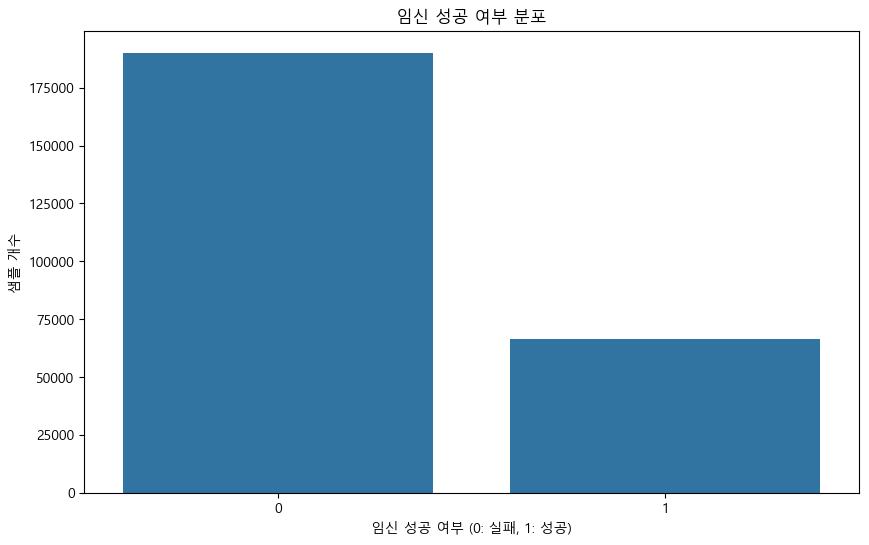

임신 성공 여부
0    190123
1     66228
Name: count, dtype: int64


In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=train, x=train['임신 성공 여부'])
plt.title("임신 성공 여부 분포")
plt.xlabel("임신 성공 여부 (0: 실패, 1: 성공)")
plt.ylabel("샘플 개수")
plt.show()

print(train['임신 성공 여부'].value_counts())

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 59 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   시술 시기 코드          256351 non-null  int32  
 1   시술 당시 나이          256351 non-null  int32  
 2   시술 유형             256351 non-null  int32  
 3   특정 시술 유형          256351 non-null  int32  
 4   배란 자극 여부          256351 non-null  int64  
 5   단일 배아 이식 여부       256351 non-null  float64
 6   착상 전 유전 진단 사용 여부  256351 non-null  float64
 7   남성 주 불임 원인        256351 non-null  int64  
 8   남성 부 불임 원인        256351 non-null  int64  
 9   여성 주 불임 원인        256351 non-null  int64  
 10  여성 부 불임 원인        256351 non-null  int64  
 11  부부 주 불임 원인        256351 non-null  int64  
 12  부부 부 불임 원인        256351 non-null  int64  
 13  불명확 불임 원인         256351 non-null  int64  
 14  불임 원인 - 여성 요인     256351 non-null  int64  
 15  배아 생성 주요 이유       256351 non-null  int32  
 16  총 시술 횟수           25

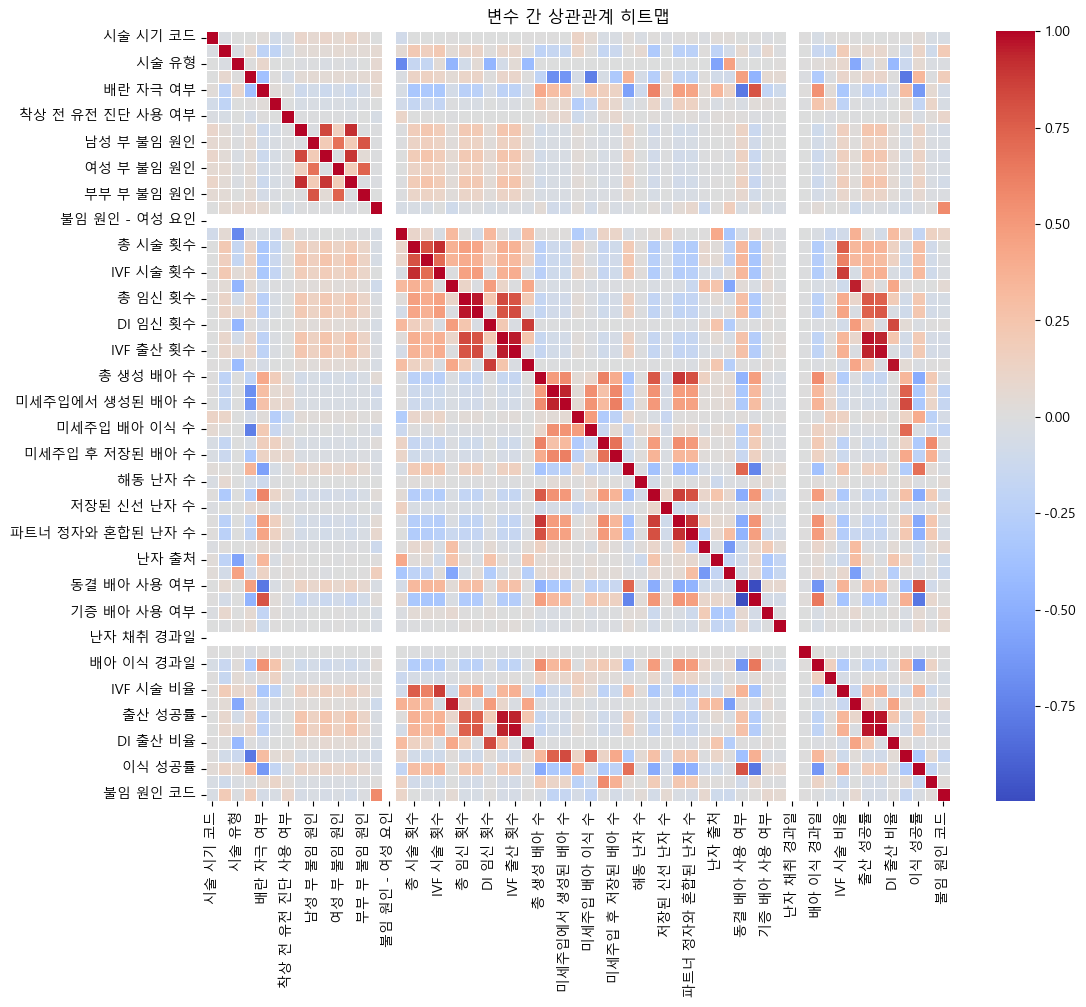

In [35]:

# 상관 행렬 계산
corr_matrix = train.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("변수 간 상관관계 히트맵")
plt.show()

In [36]:
# 다중공선성 확인 (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train.drop(columns=["임신 성공 여부"])  # 타겟 변수 제외
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             Feature           VIF
22          DI 임신 횟수           inf
21         IVF 임신 횟수           inf
20           총 임신 횟수           inf
23           총 출산 횟수  2.582269e+04
24         IVF 출산 횟수  2.402696e+04
25          DI 출산 횟수  1.874608e+03
51            출산 성공률  9.579079e+02
52         IVF 출산 비율  9.242462e+02
43       신선 배아 사용 여부  2.337182e+02
2              시술 유형  1.694705e+02
37          혼합된 난자 수  1.328726e+02
16           총 시술 횟수  1.277453e+02
18         IVF 시술 횟수  1.080033e+02
38  파트너 정자와 혼합된 난자 수  9.180424e+01
53          DI 출산 비율  7.838696e+01
42       동결 배아 사용 여부  4.866639e+01
28   미세주입에서 생성된 배아 수  4.252445e+01
11        부부 주 불임 원인  3.857407e+01
40             난자 출처  3.786808e+01
7         남성 주 불임 원인  3.413989e+01
41             정자 출처  3.387352e+01
27        미세주입된 난자 수  2.867404e+01
26         총 생성 배아 수  2.760766e+01
4           배란 자극 여부  2.464884e+01
29          이식된 배아 수  2.078335e+01
35       수집된 신선 난자 수  1.985396e+01
9         여성 주 불임 원인  1.876459e+01
19          DI 시술 횟수

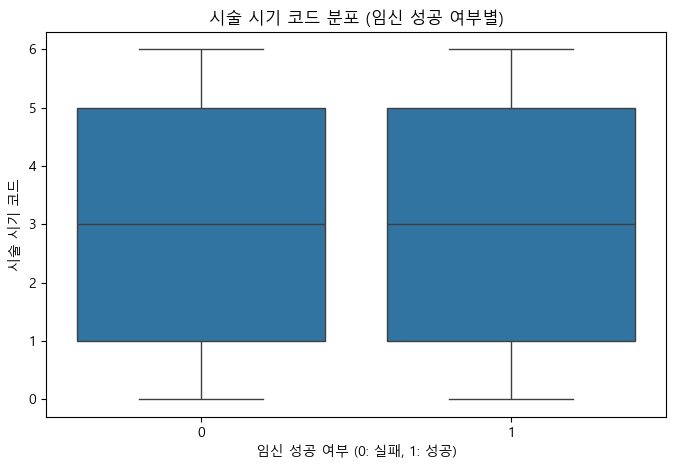

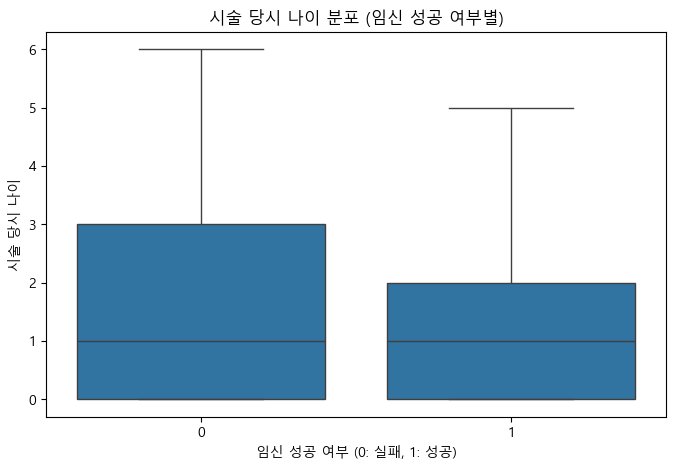

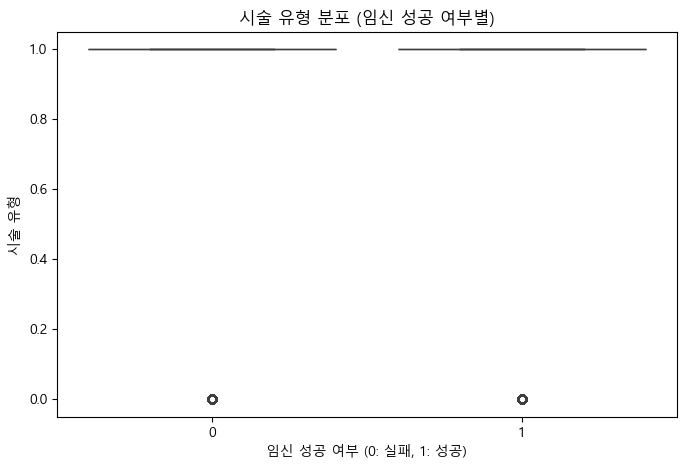

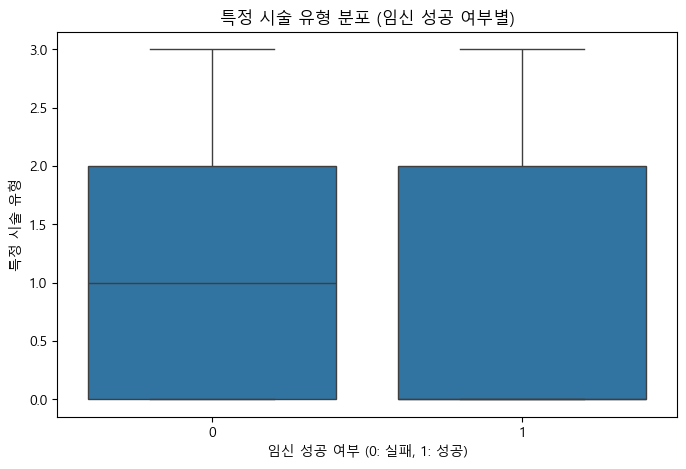

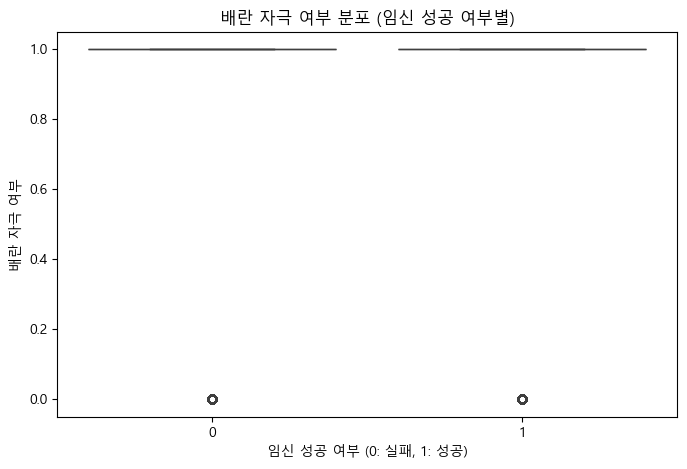

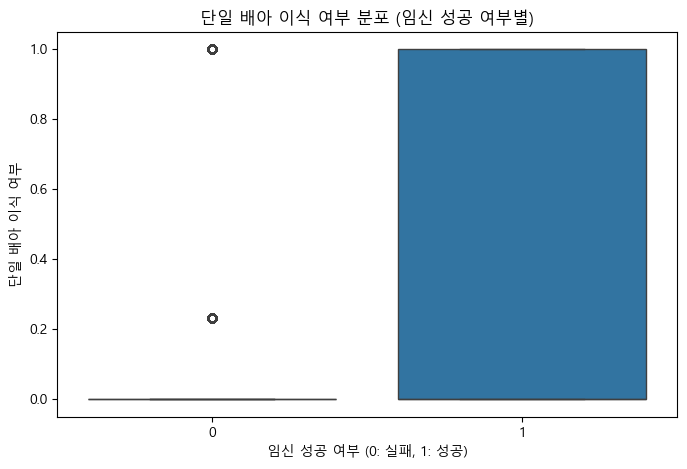

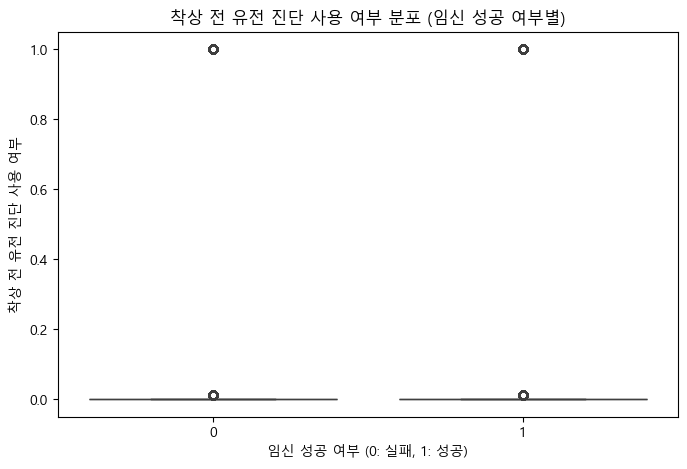

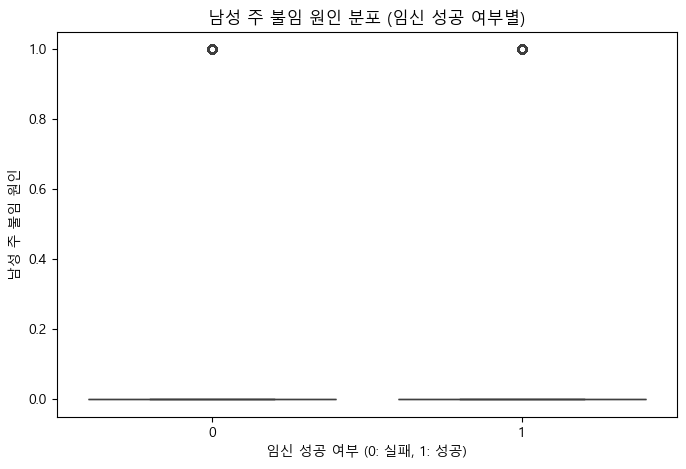

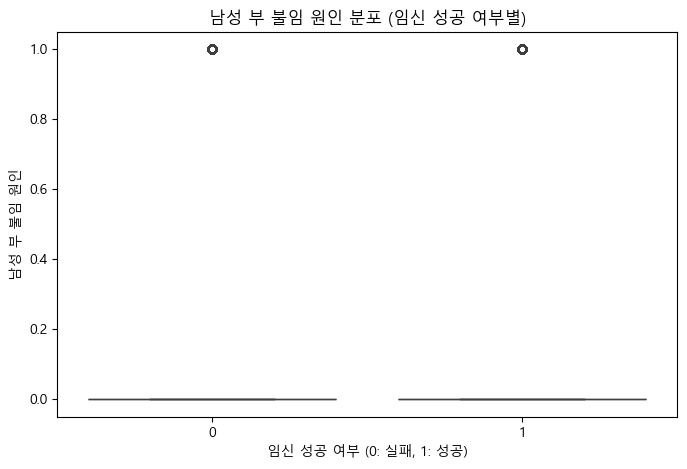

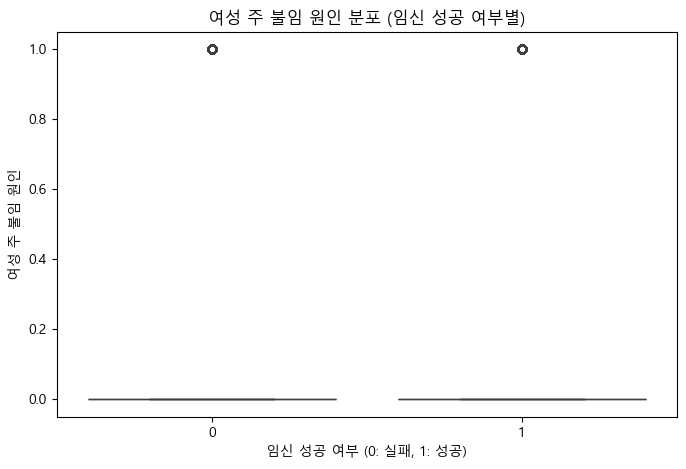

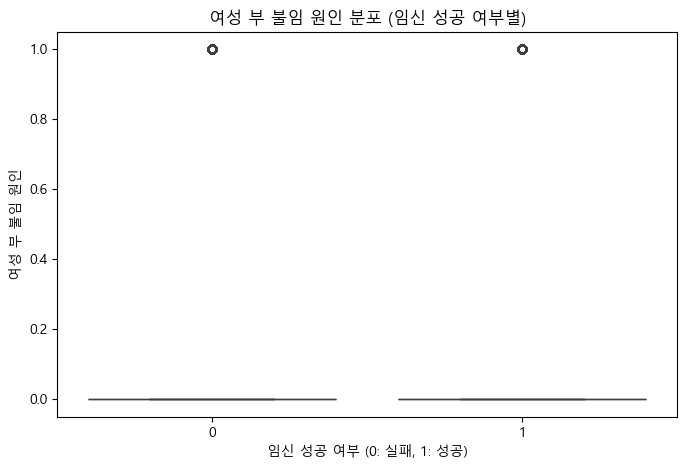

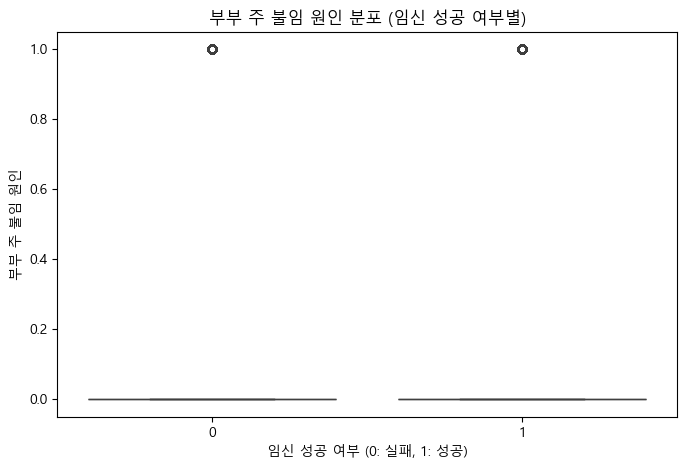

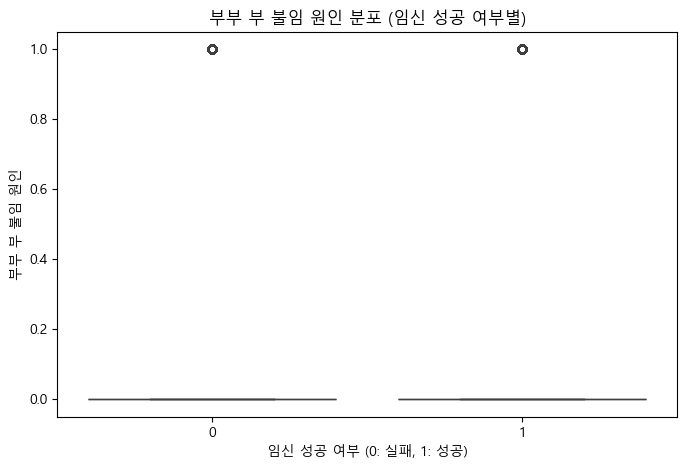

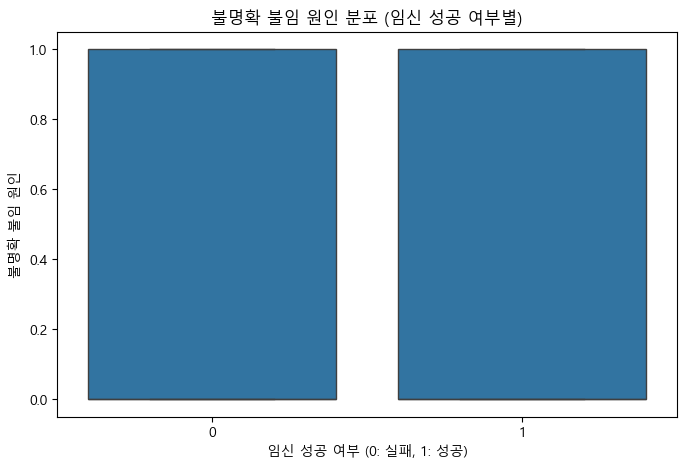

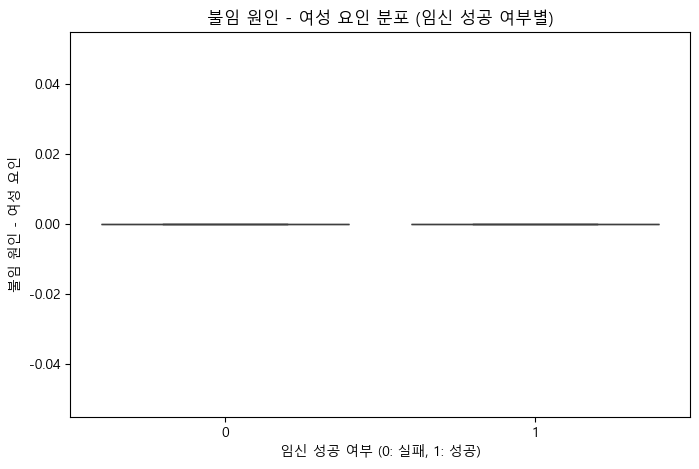

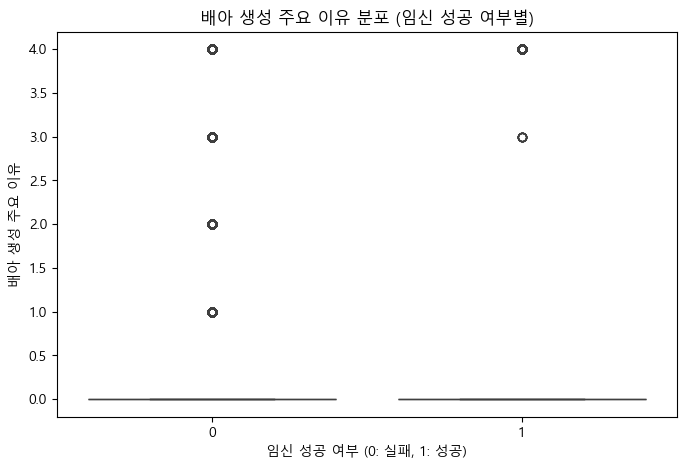

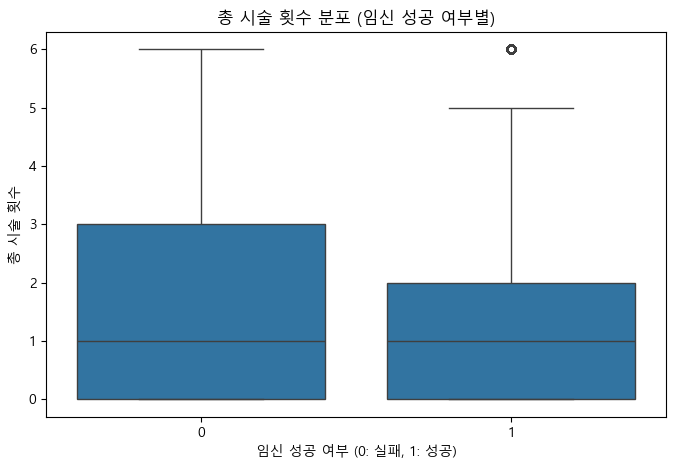

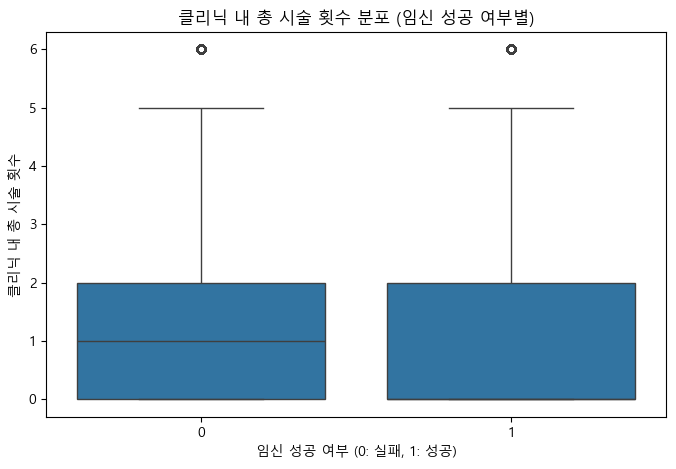

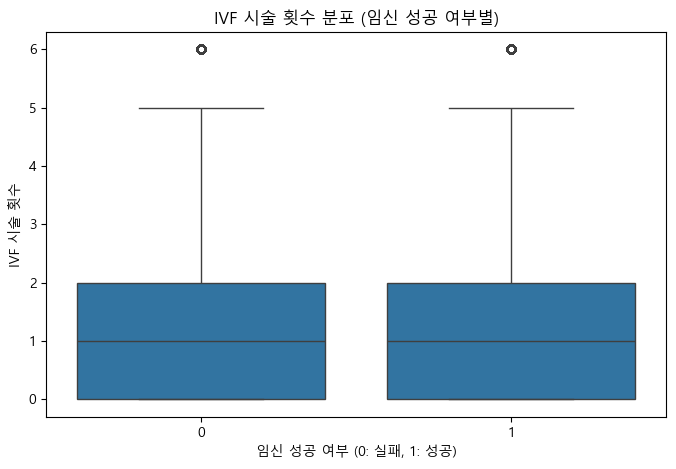

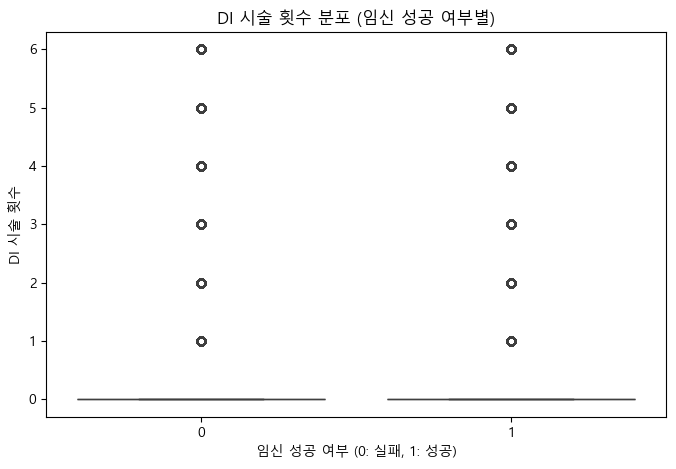

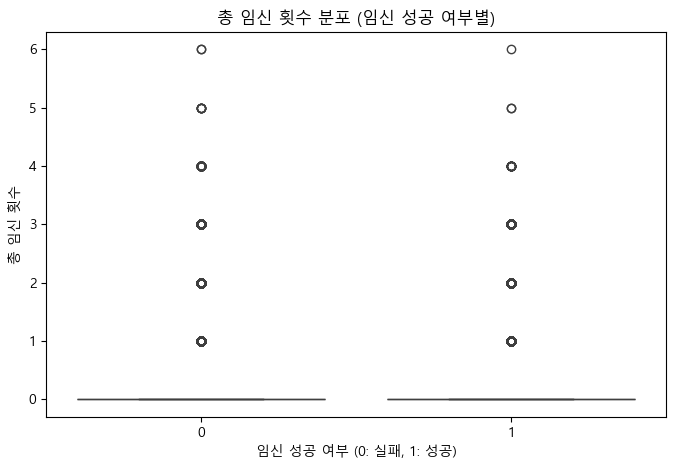

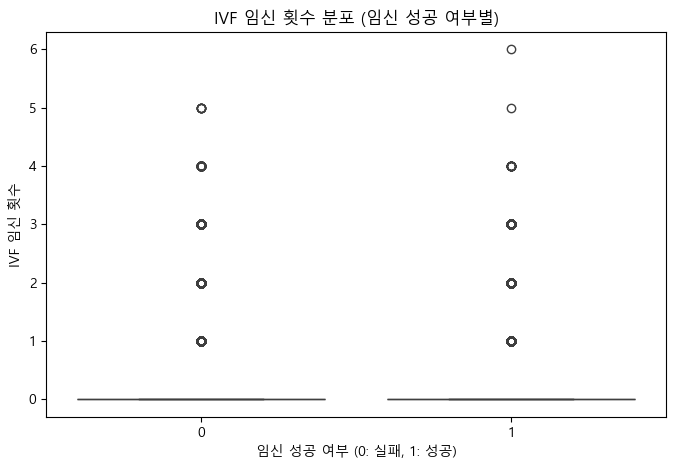

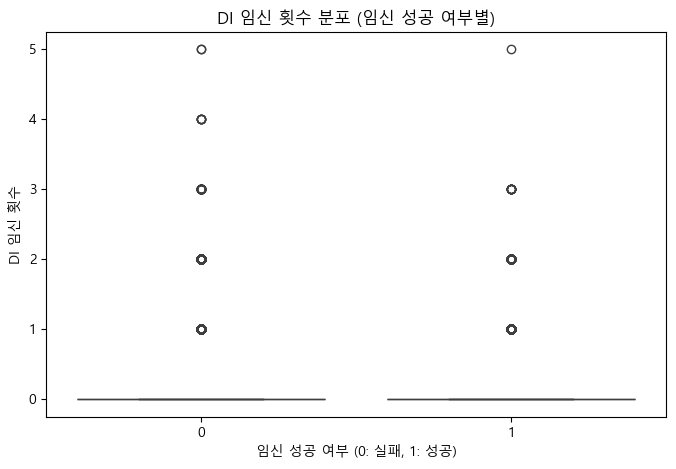

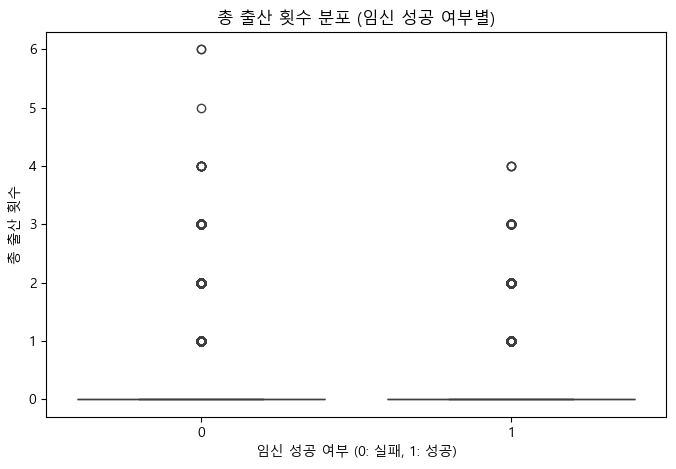

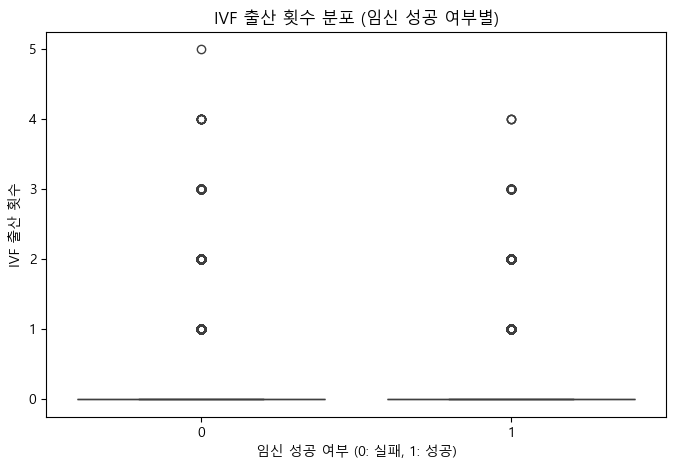

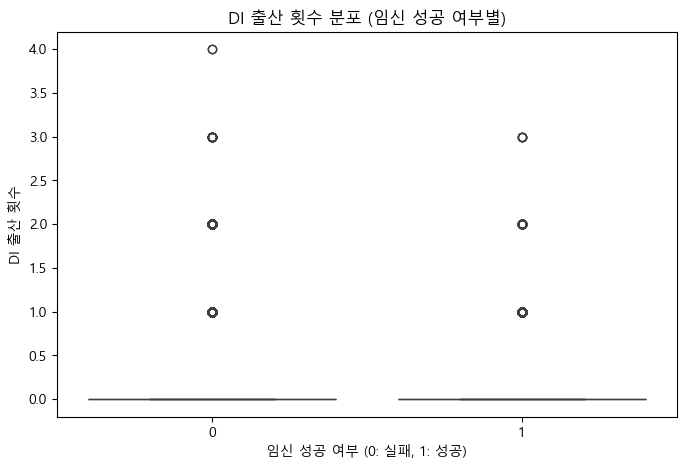

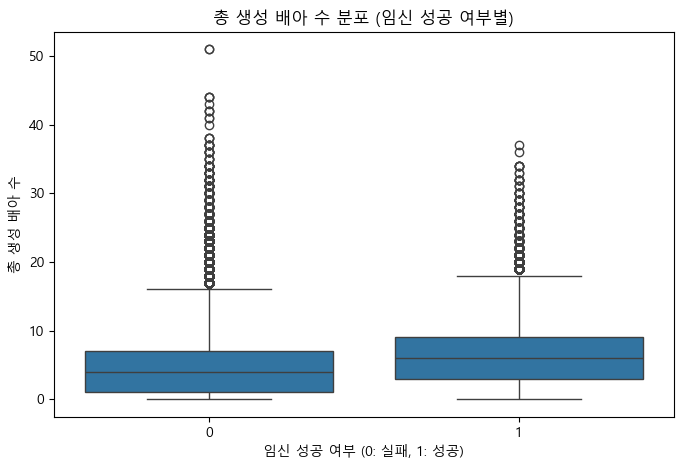

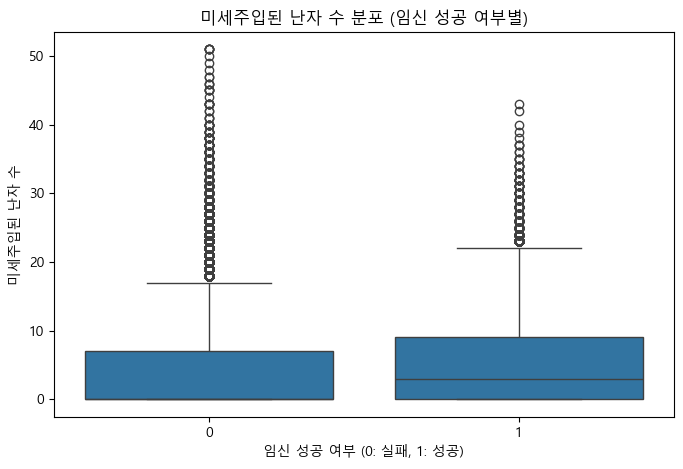

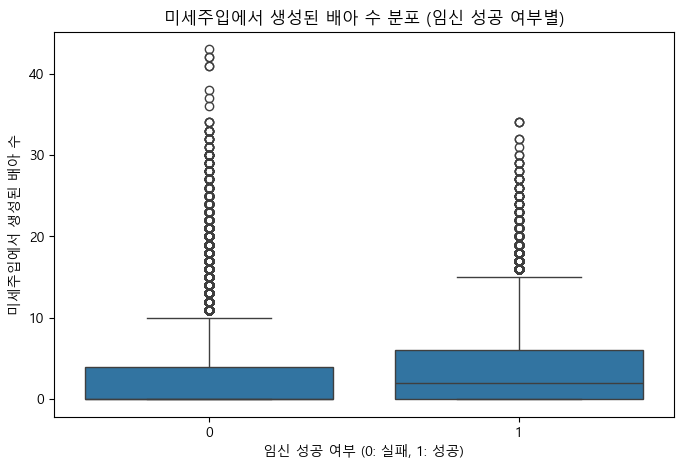

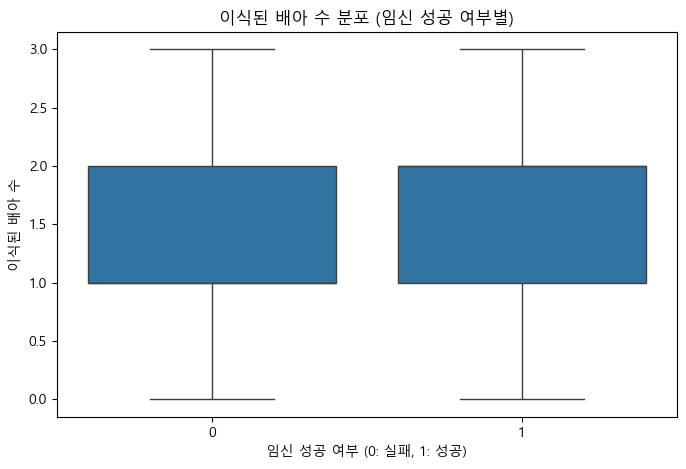

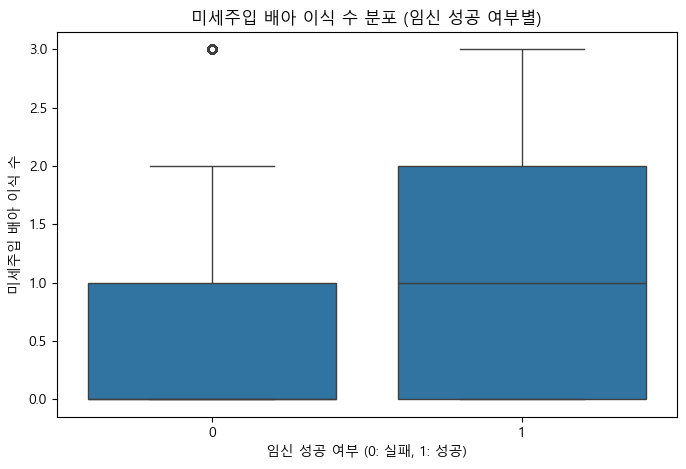

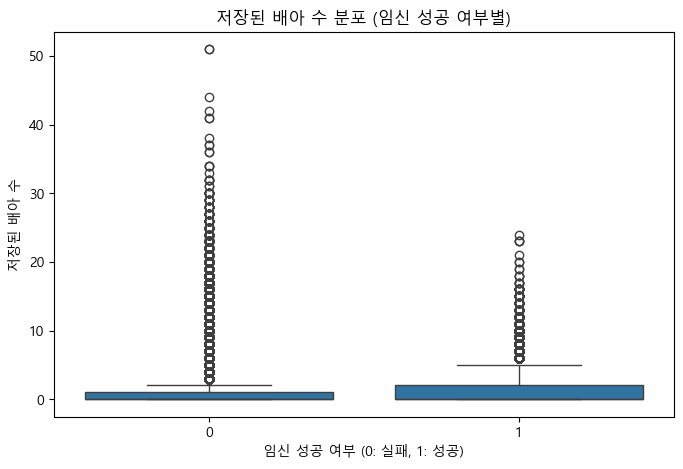

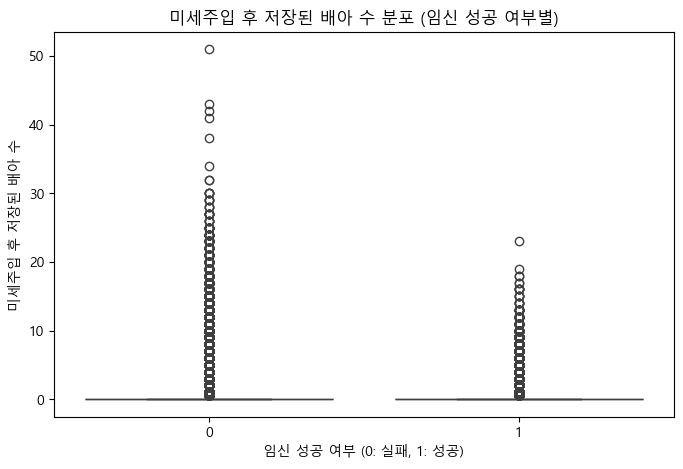

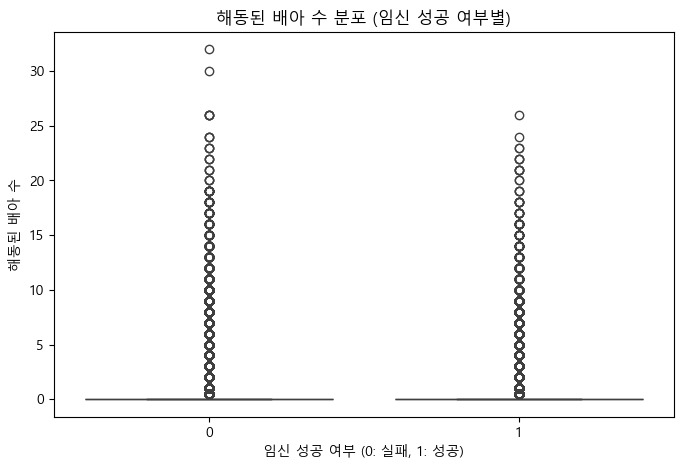

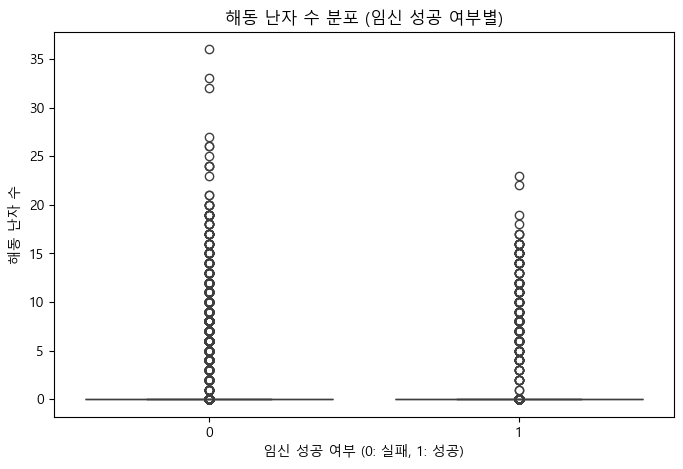

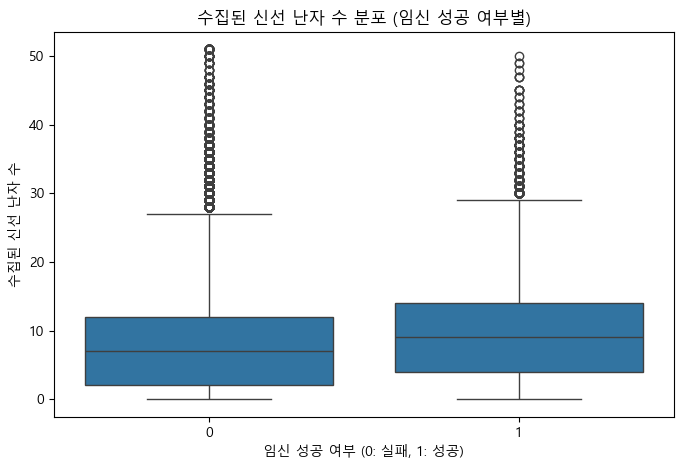

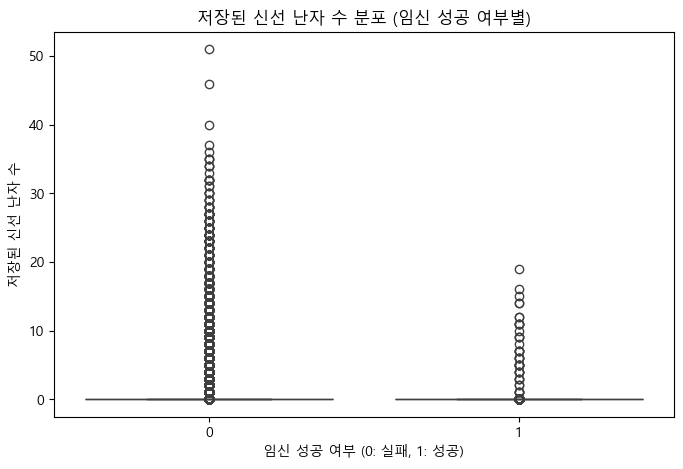

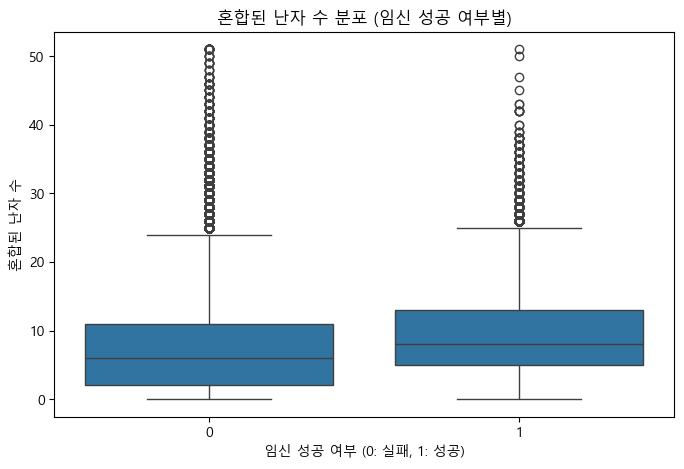

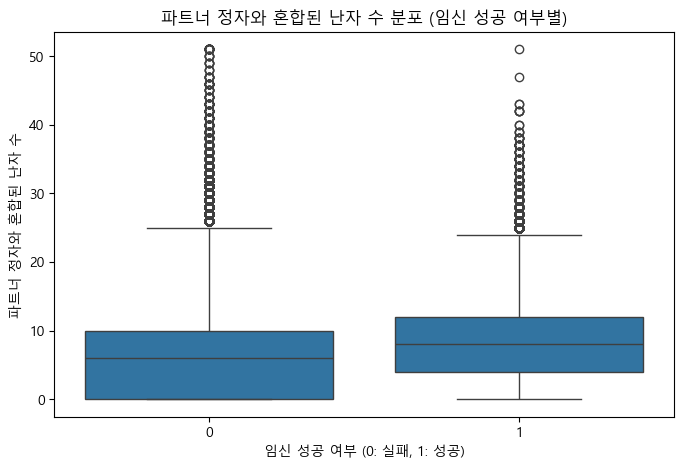

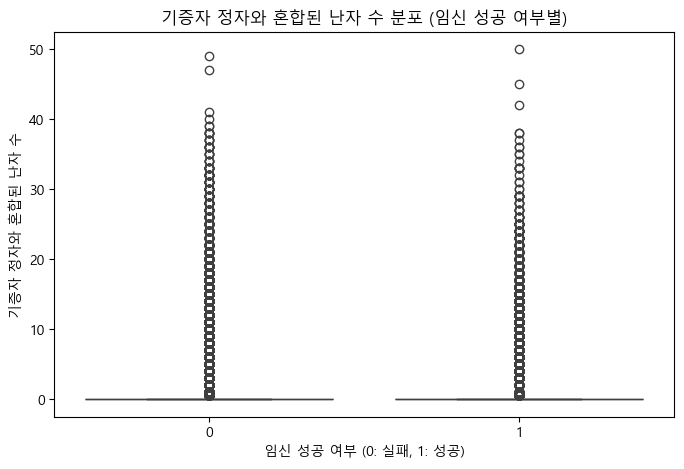

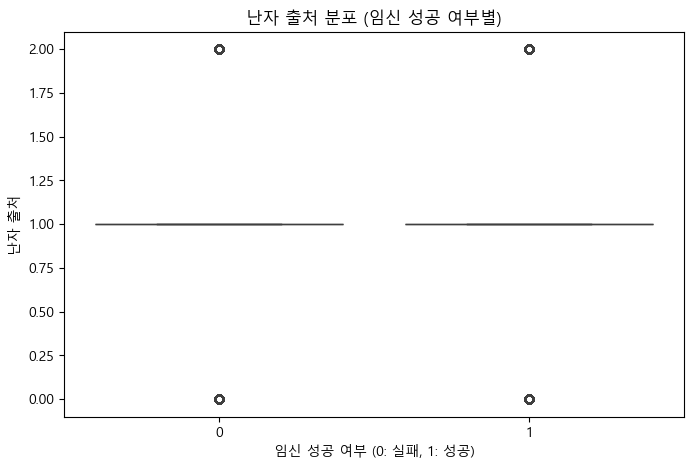

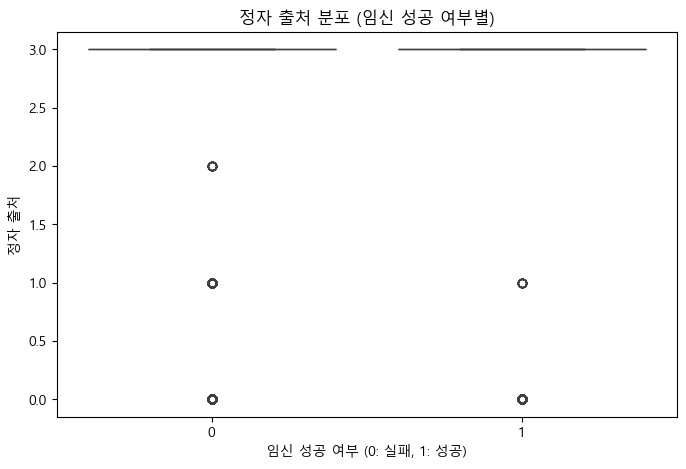

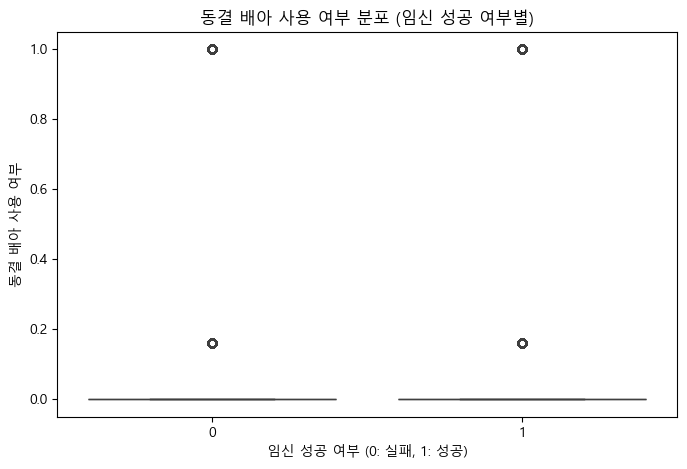

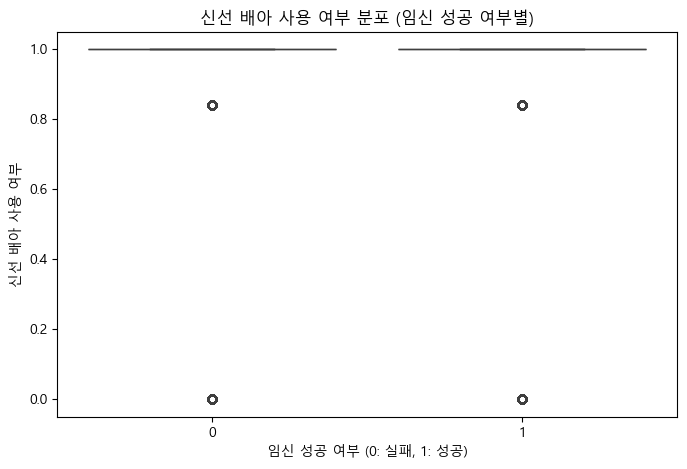

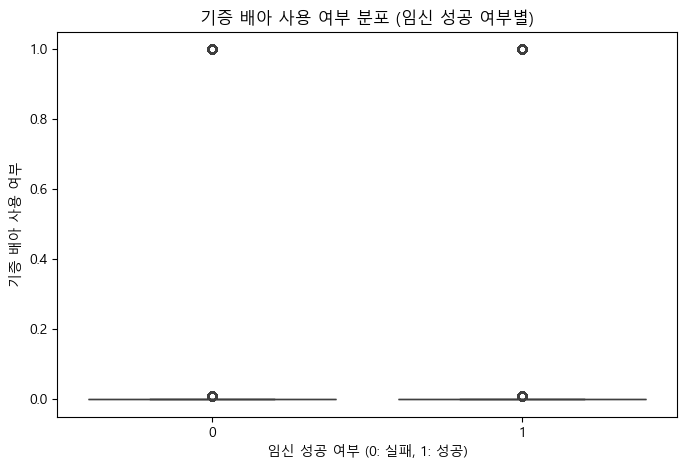

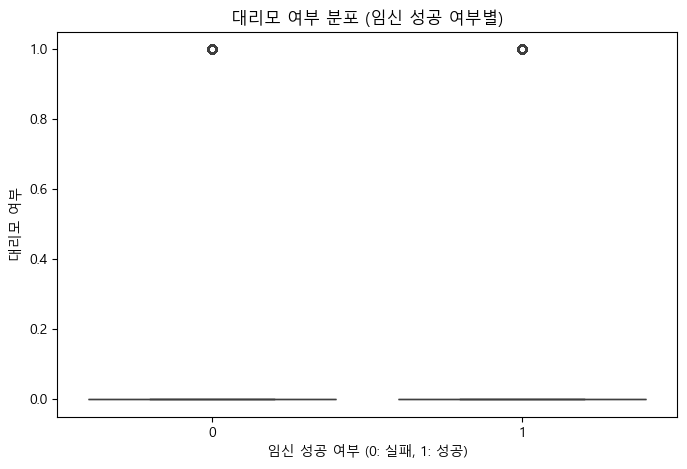

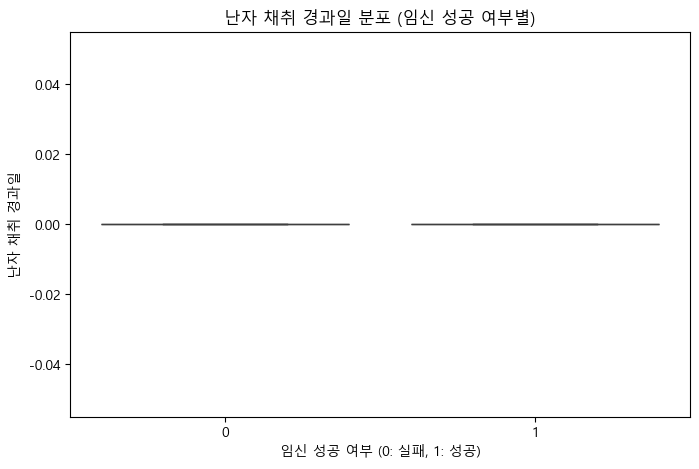

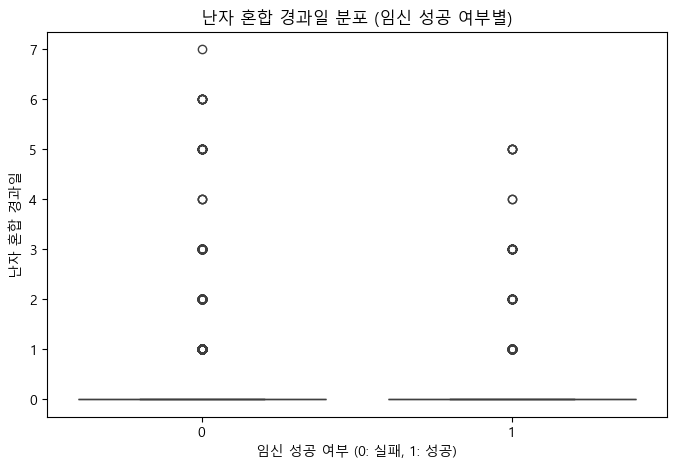

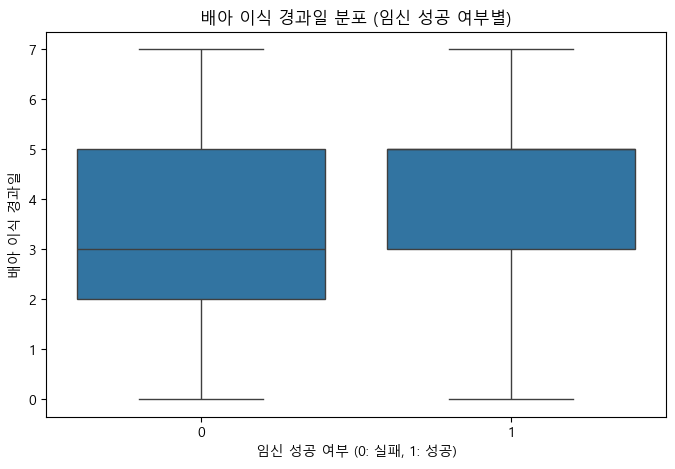

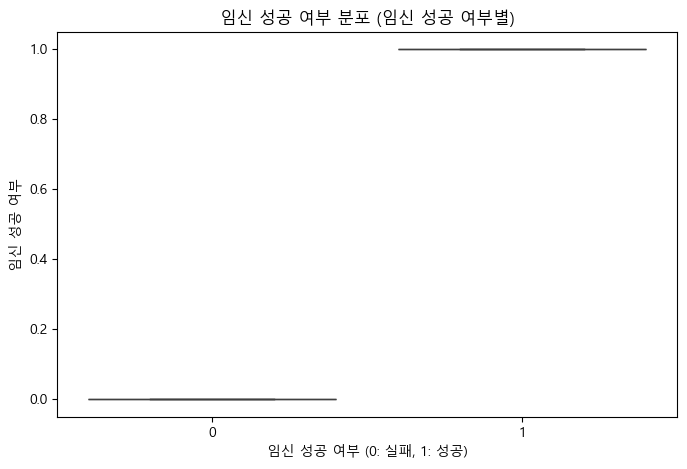

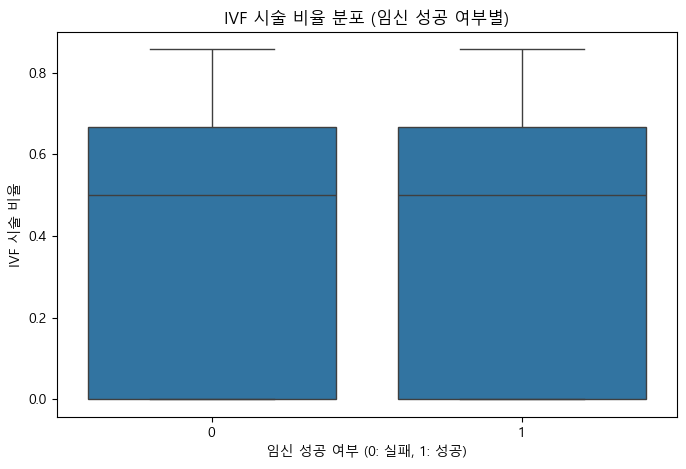

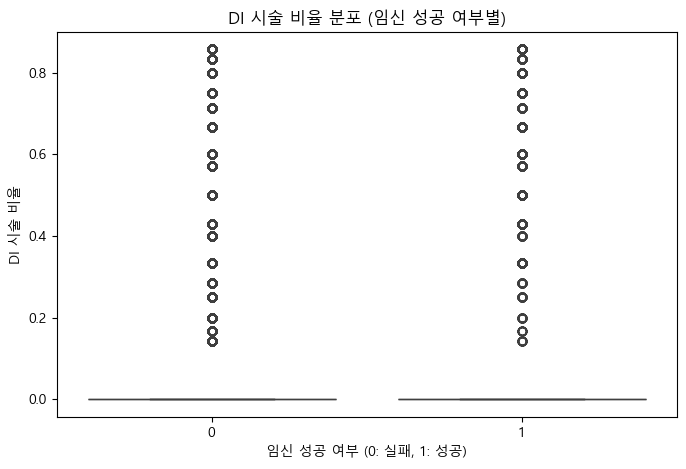

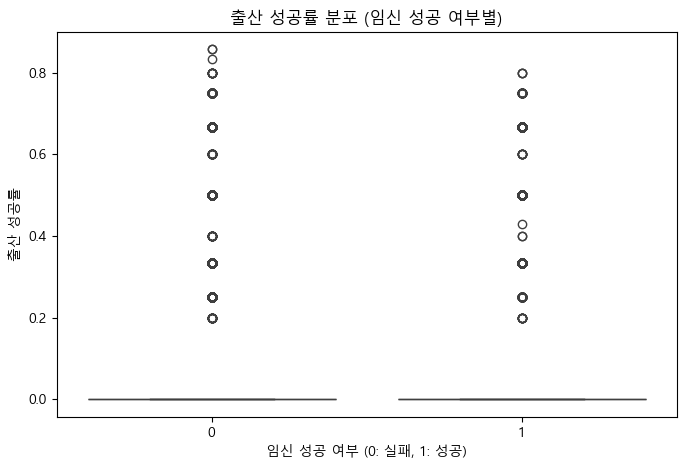

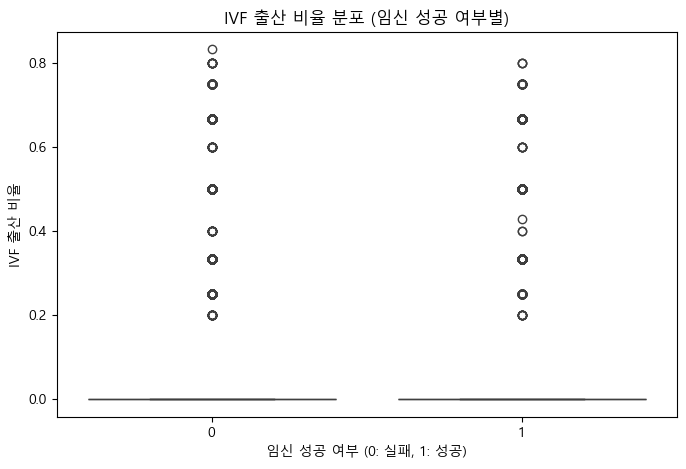

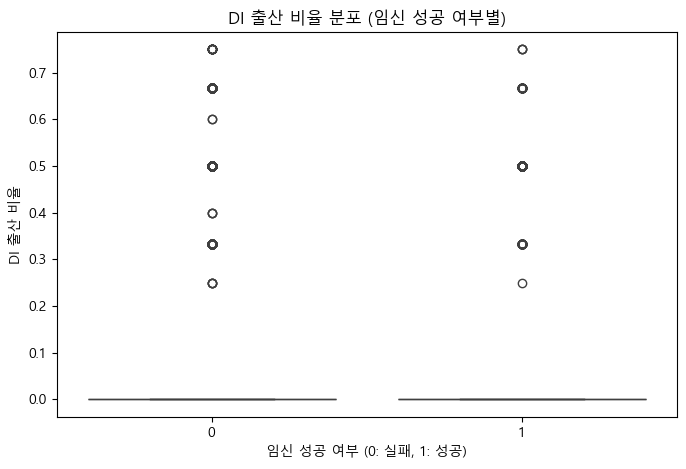

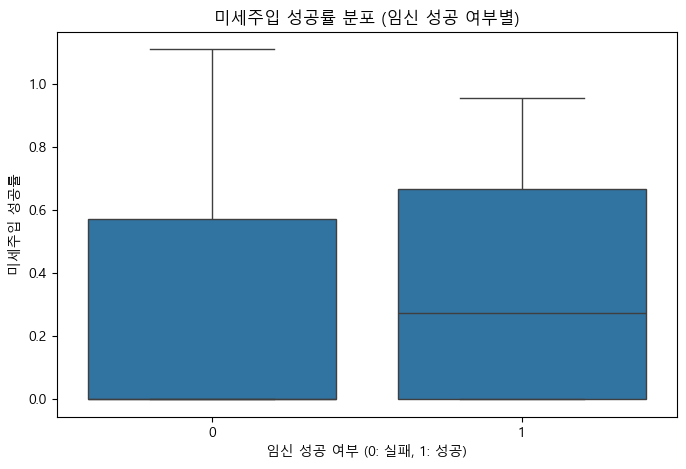

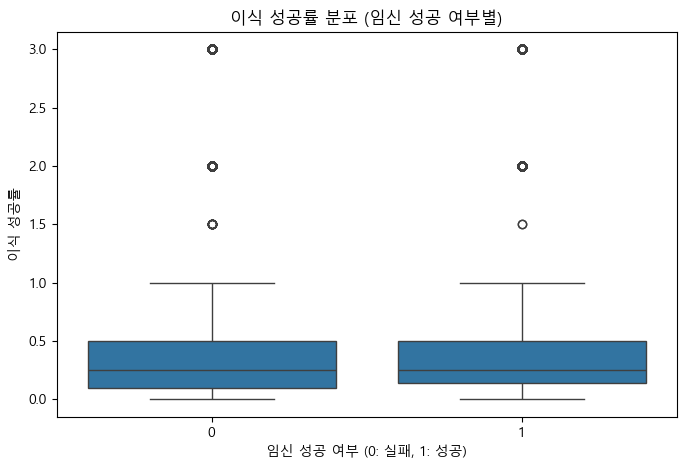

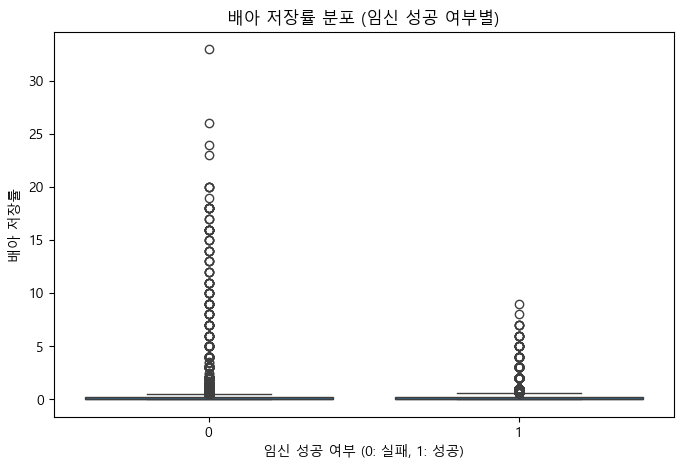

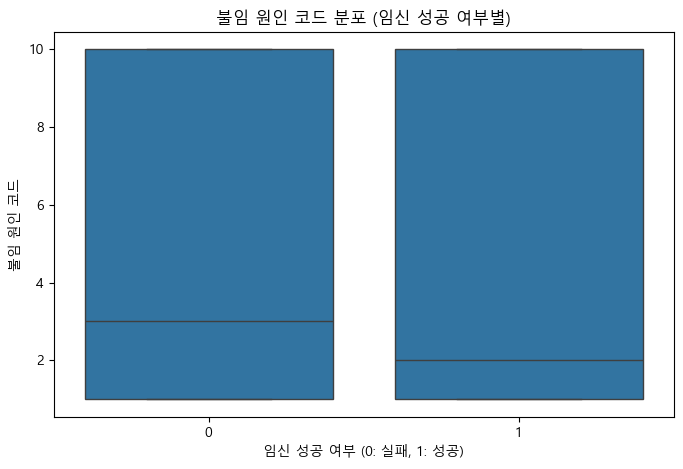

In [37]:
# 주요 변수 리스트
important_features = train.columns

# 변수별 분포 비교
for feature in important_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=train['임신 성공 여부'], y=train[feature])
    plt.title(f"{feature} 분포 (임신 성공 여부별)")
    plt.xlabel("임신 성공 여부 (0: 실패, 1: 성공)")
    plt.ylabel(feature)
    plt.show()

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 주요 변수 리스트
important_features = train.columns

# 변수별 분포 비교 및 IQR 계산
for feature in important_features:
    
    # IQR 계산
    Q1 = train[feature].quantile(0.25)
    Q3 = train[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR 출력
    print(f"{feature} - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    
    plt.show()


시술 시기 코드 - Q1: 1.00, Q3: 5.00, IQR: 4.00
시술 당시 나이 - Q1: 0.00, Q3: 2.00, IQR: 2.00
시술 유형 - Q1: 1.00, Q3: 1.00, IQR: 0.00
특정 시술 유형 - Q1: 0.00, Q3: 2.00, IQR: 2.00
배란 자극 여부 - Q1: 1.00, Q3: 1.00, IQR: 0.00
단일 배아 이식 여부 - Q1: 0.00, Q3: 0.23, IQR: 0.23
착상 전 유전 진단 사용 여부 - Q1: 0.00, Q3: 0.00, IQR: 0.00
남성 주 불임 원인 - Q1: 0.00, Q3: 0.00, IQR: 0.00
남성 부 불임 원인 - Q1: 0.00, Q3: 0.00, IQR: 0.00
여성 주 불임 원인 - Q1: 0.00, Q3: 0.00, IQR: 0.00
여성 부 불임 원인 - Q1: 0.00, Q3: 0.00, IQR: 0.00
부부 주 불임 원인 - Q1: 0.00, Q3: 0.00, IQR: 0.00
부부 부 불임 원인 - Q1: 0.00, Q3: 0.00, IQR: 0.00
불명확 불임 원인 - Q1: 0.00, Q3: 1.00, IQR: 1.00
불임 원인 - 여성 요인 - Q1: 0.00, Q3: 0.00, IQR: 0.00
배아 생성 주요 이유 - Q1: 0.00, Q3: 0.00, IQR: 0.00
총 시술 횟수 - Q1: 0.00, Q3: 2.00, IQR: 2.00
클리닉 내 총 시술 횟수 - Q1: 0.00, Q3: 2.00, IQR: 2.00
IVF 시술 횟수 - Q1: 0.00, Q3: 2.00, IQR: 2.00
DI 시술 횟수 - Q1: 0.00, Q3: 0.00, IQR: 0.00
총 임신 횟수 - Q1: 0.00, Q3: 0.00, IQR: 0.00
IVF 임신 횟수 - Q1: 0.00, Q3: 0.00, IQR: 0.00
DI 임신 횟수 - Q1: 0.00, Q3: 0.00, IQR: 0.00
총 출산 횟수 - Q1: 0.00, Q3:

In [41]:
d

NameError: name 'd' is not defined

In [38]:
# 다중공선성 확인할 변수 선택
vif_features = ['출산 성공률', '이식 성공률', 'IVF 출산 비율', 'DI 출산 비율', 
                'IVF 시술 비율', 'DI 시술 비율', '배아 저장률']

# VIF 계산을 위한 데이터 준비
X = train[vif_features].dropna()
X = X.astype(float)  # float 타입 변환

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Feature         VIF
0     출산 성공률  917.090591
1     이식 성공률    1.782310
2  IVF 출산 비율  858.455022
3   DI 출산 비율   56.809796
4  IVF 시술 비율    2.071086
5   DI 시술 비율    1.283226
6     배아 저장률    1.043619


In [39]:
# 다중공선성이 높은 변수 제거
drop_cols = ["IVF 출산 비율", "DI 출산 비율"]
train = train.drop(columns=drop_cols, errors='ignore')
test = test.drop(columns=drop_cols, errors='ignore')

In [40]:
# 제거 후 VIF 다시 계산
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 다중공선성 확인할 변수 선택
vif_features = ["출산 성공률", "이식 성공률", "IVF 시술 비율", "DI 시술 비율", "배아 저장률"]

# VIF 계산을 위한 데이터 준비
X = train[vif_features].dropna()
X = X.astype(float)

# VIF 다시 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Feature       VIF
0     출산 성공률  1.363149
1     이식 성공률  1.780505
2  IVF 시술 비율  2.053841
3   DI 시술 비율  1.041886
4     배아 저장률  1.043380


In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_curve, auc, precision_recall_curve, confusion_matrix,
                           classification_report, average_precision_score)
from sklearn.calibration import calibration_curve

In [42]:
test.columns

Index(['시술 시기 코드', '시술 당시 나이', '시술 유형', '특정 시술 유형', '배란 자극 여부', '단일 배아 이식 여부',
       '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인',
       '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 여성 요인',
       '배아 생성 주요 이유', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수',
       '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수',
       '총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수',
       '미세주입 배아 이식 수', '저장된 배아 수', '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수',
       '수집된 신선 난자 수', '저장된 신선 난자 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수',
       '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처', '동결 배아 사용 여부', '신선 배아 사용 여부',
       '기증 배아 사용 여부', '대리모 여부', '난자 채취 경과일', '난자 혼합 경과일', '배아 이식 경과일',
       'IVF 시술 비율', 'DI 시술 비율', '출산 성공률', '미세주입 성공률', '이식 성공률', '배아 저장률',
       '불임 원인 코드'],
      dtype='object')

In [44]:
train.head()

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,...,난자 혼합 경과일,배아 이식 경과일,임신 성공 여부,IVF 시술 비율,DI 시술 비율,출산 성공률,미세주입 성공률,이식 성공률,배아 저장률,불임 원인 코드
0,6,0,1,0,1,0.0,0.0,0,0,0,...,0.0,3.0,0,0.0,0.0,0.0,0.666667,0.400000,0.4,1
1,5,5,1,0,0,0.0,0.0,0,0,0,...,0.0,3.0,0,0.0,0.0,0.0,0.000000,0.000000,0.0,10
2,3,0,1,2,1,0.0,0.0,0,0,0,...,0.0,2.0,0,0.5,0.0,0.0,0.000000,0.333333,0.0,1
3,2,1,1,0,1,0.0,0.0,0,0,0,...,0.0,3.0,0,0.5,0.0,0.0,0.000000,0.000000,0.0,1
4,3,0,1,0,1,0.0,0.0,0,0,0,...,0.0,3.0,0,0.0,0.0,0.0,0.857143,0.285714,0.0,2


In [43]:
X = train.drop(['임신 성공 여부'] , axis=1)
Y = train['임신 성공 여부']

print(X.shape)
print(Y.shape)

(256351, 56)
(256351,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size=0.2, random_state=42, stratify=Y
)

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train
)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(164064, 56)
(51271, 56)
(164064,)
(51271,)
(41016, 56)
(41016,)


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# 1️⃣ SMOTE 적용 (1 클래스 샘플 증가)
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # 1 클래스가 0 클래스의 80%가 되도록 증강
X_resampled, y_resampled = smote.fit_resample(X, Y)

# 2️⃣ 언더샘플링 적용 (0 클래스 샘플 감소)
under_sampler = RandomUnderSampler(sampling_strategy="auto", random_state=42)  # 자동 조정
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

# 데이터 크기 확인
print("After SMOTE + Under-sampling:", pd.Series(y_resampled).value_counts().to_dict())




After SMOTE + Under-sampling: {0: 152098, 1: 152098}


In [46]:
print("X_train shape:", X.shape)
print("Y_train shape:", Y.shape)

print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)


X_train shape: (256351, 56)
Y_train shape: (256351,)
X_resampled shape: (304196, 56)
y_resampled shape: (304196,)


In [47]:
# 모델 정의
models = {
    'Extra Trees': ExtraTreesClassifier(max_depth= None, min_samples_split = 2, n_estimators = 200, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(iterations= 200, learning_rate= 0.1, verbose=0, random_state=42),
    'LightGBM': LGBMClassifier(learning_rate= 0.1, n_estimators= 200, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(learning_rate= 0.1, n_estimators=200, random_state=42, n_jobs=-1),
    'Random Forest': RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
}

In [48]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

# ✅ 각 모델별 Test 예측값을 저장할 리스트 (Soft Voting 적용을 위한 확률 평균)
test_predictions = {name: np.zeros((X_test.shape[0], 2)) for name in models.keys() if hasattr(models[name], "predict_proba")}
submission_predictions = {name: np.zeros((test.shape[0], 2)) for name in models.keys() if hasattr(models[name], "predict_proba")}

# ✅ KFold 적용
for fold, (train_idx, val_idx) in enumerate(kf.split(X_resampled)):
    print(f"\n=== Fold {fold+1} ===")

    # KFold 데이터 분할
    X_train_fold, X_val_fold = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    Y_train_fold, Y_val_fold = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]

    for name, model in models.items():
        if hasattr(model, "predict_proba"):  # `predict_proba()`를 지원하는 모델만 사용
            print(f"\n--- Training {name} ---")
            
            # 모델 학습
            model.fit(X_train_fold, Y_train_fold)

            # 훈련 세트 성능 평가
            Y_train_pred = model.predict(X_train_fold)
            print("\n--- Training Set Performance ---")
            print(classification_report(Y_train_fold, Y_train_pred))

            # 검증 세트 성능 평가
            Y_val_pred = model.predict(X_val_fold)
            print("\n--- Validation Set Performance ---")
            print(classification_report(Y_val_fold, Y_val_pred))

            # ✅ X_test 예측값 저장 (Soft Voting을 위해 확률 예측값 사용)
            test_predictions[name] += model.predict_proba(X_test) / kf.n_splits  # 확률 평균 계산
            
            # ✅ 실제 test.csv 데이터 예측값 저장
            submission_predictions[name] += model.predict_proba(test) / kf.n_splits  # 확률 평균 계산

        else:
            print(f"⚠ Warning: {name} 모델은 `predict_proba()`를 지원하지 않습니다. 제외됨.")

# ✅ Soft Voting을 위한 최종 예측값 생성 (개별 모델 결과 확률 평균)
ensemble_pred_proba = np.mean(list(test_predictions.values()), axis=0)
submission_pred_proba = np.mean(list(submission_predictions.values()), axis=0)  # 실제 test.csv 예측값

# ✅ 확률 기반 예측값 변환 (Soft Voting)
Y_test_pred_soft_voting = np.argmax(ensemble_pred_proba, axis=1)

print("\n=== Final Test Evaluation (Soft Voting) ===")
print("\n--- Test Set Performance ---")
print(classification_report(Y_test, Y_test_pred_soft_voting))

# ✅ Soft Voting을 위한 확률 예측값 저장 (Positive Class 확률)
final_probabilities = ensemble_pred_proba[:, 1]  # 검증 데이터 (X_test) Positive Class 확률
submission_probabilities = submission_pred_proba[:, 1]  # 제출 데이터 (test.csv) Positive Class 확률

# ✅ Kaggle 제출 파일 생성
sample_submission = pd.read_csv('./data/sample_submission.csv')  # 제출 템플릿 불러오기
sample_submission['probability'] = submission_probabilities  # 확률 값 저장

# ✅ CSV 저장 (index=False)
sample_submission.to_csv('./data/submission.csv', index=False)

print("\n✅ 제출 파일이 생성되었습니다: submission.csv")



=== Fold 1 ===

--- Training Extra Trees ---

--- Training Set Performance ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    121781
           1       1.00      0.99      1.00    121575

    accuracy                           1.00    243356
   macro avg       1.00      1.00      1.00    243356
weighted avg       1.00      1.00      1.00    243356


--- Validation Set Performance ---
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     30317
           1       0.78      0.79      0.78     30523

    accuracy                           0.78     60840
   macro avg       0.78      0.78      0.78     60840
weighted avg       0.78      0.78      0.78     60840


--- Training CatBoost ---

--- Training Set Performance ---
              precision    recall  f1-score   support

           0       0.76      0.84      0.80    121781
           1       0.82      0.74      0.78    121575

    a